<a href="https://colab.research.google.com/github/ativitbenz/Risk-Default-Management-in-Online-Peer-to-Peer-Lending/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
parse_col = ['issue_d', 'last_pymnt_d', 'earliest_cr_line', 'last_credit_pull_d']
df_original = pd.read_csv('/content/drive/MyDrive/Independent Study/Dataset/Loan_status_2007-2020Q3.csv', parse_dates=parse_col).iloc[:,2:]
df_original.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,49,59,118,128,129,130,133,134,135,138) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,1999-04-01,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0.0,1996-02-01,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0.0,1996-01-01,695.0,699.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,0.0,0.0,4066.908161,4066.91,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


Text(0.5, 1.0, 'Loan Amount Value Distribution')

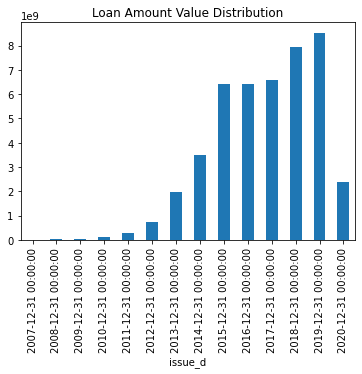

In [ ]:
# count loan amount per year 
parse_dates = df_original.groupby(pd.Grouper(key='issue_d', axis=0, freq='Y')).sum()

# plot graph
parse_dates.loan_amnt.plot.bar()
plt.title('Loan Amount Value Distribution')

In [ ]:
# Selecting most recent 5 years
d = pd.date_range(start='1/1/2016', end='31/12/2020')
df_sample = df_original.loc[df_original.issue_d.isin(d)]
df_sample.shape

(2038052, 141)

In [ ]:
df_sample['loan_status'].value_counts()

Current               1013507
Fully Paid             788161
Charged Off            205768
Late (31-120 days)      15761
In Grace Period          9738
Late (16-30 days)        2643
Issued                   2062
Default                   412
Name: loan_status, dtype: int64

In [ ]:
df_sample.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038052 entries, 230717 to 2925492
Data columns (total 141 columns):
 #   Column                                      Dtype         
---  ------                                      -----         
 0   id                                          object        
 1   loan_amnt                                   float64       
 2   funded_amnt                                 float64       
 3   funded_amnt_inv                             float64       
 4   term                                        object        
 5   int_rate                                    object        
 6   installment                                 float64       
 7   grade                                       object        
 8   sub_grade                                   object        
 9   emp_title                                   object        
 10  emp_length                                  object        
 11  home_ownership                              

# Select columns

In [ ]:
borrower_col = ['annual_inc', 'application_type', 'avg_cur_bal', 'dti', 'emp_length', 'emp_title', 'fico_range_low',
                'grade', 'home_ownership', 'installment', 'int_rate', 'loan_amnt', 
                'loan_status', 'mort_acc', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 
                'revol_util', 'sub_grade', 'term', 'verification_status', 'issue_d', 'last_pymnt_d', 'open_acc', 'total_acc', 'addr_state']

co_borrower_col = ['annual_inc_joint', 'dti_joint', 'revol_bal_joint', 'sec_app_fico_range_low',
                  'sec_app_mort_acc', 'sec_app_open_acc']

col_to_use = borrower_col + co_borrower_col
df_sample = df_sample[col_to_use]

# # check duplicate columns 
# unique_cols = [col for col in df_sample.columns.values if df_sample[col].nunique() == 1]
# print("Dropped columns:", unique_cols)

# # filter loan status that fully paid, chaeged off
# df_sample = df_sample.loc[df_sample['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# # convert target values to 0,1 
# df_sample['loan_status'] = df_sample.loan_status.map({'Fully Paid':0, 'Charged Off':1})

# remove % column int rate, revol_util and convert str to float  
df_sample[['int_rate', 'revol_util']] = df_sample[['int_rate', 'revol_util']].apply(
                                                  lambda x: x.str.rstrip('%').astype('float'))

In [ ]:
# # save
# df_sample.to_csv('/content/drive/MyDrive/Independent Study/Dataset/5_year_recently_v5.csv', index=False)

In [ ]:
loans = pd.read_csv('/content/drive/MyDrive/Independent Study/Dataset/5_year_recently_v5.csv')

In [ ]:
# check type
print(f"{loans.dtypes}\n")
# check missing values
print(f"Sum of null values in each feature:\n{35 * '-'}")
print(f"{loans.isnull().sum()}")

annual_inc                float64
application_type           object
avg_cur_bal               float64
dti                       float64
emp_length                 object
emp_title                  object
fico_range_low            float64
grade                      object
home_ownership             object
installment               float64
int_rate                  float64
loan_amnt                 float64
loan_status                object
mort_acc                  float64
pub_rec_bankruptcies      float64
purpose                    object
revol_bal                 float64
revol_util                float64
sub_grade                  object
term                       object
verification_status        object
issue_d                    object
last_pymnt_d               object
open_acc                  float64
total_acc                 float64
addr_state                 object
annual_inc_joint          float64
dti_joint                 float64
revol_bal_joint           float64
sec_app_fico_r

In [ ]:
loans.shape

(2038052, 32)

In [ ]:
# # check numerical columns 
# cred_num = df_sample.select_dtypes(exclude=['object'])
# cred_num.columns

In [ ]:
# # EDA check correalation 
# corr_col = ['annual_inc', 'avg_cur_bal', 'dti', 'fico_range_low', 'inq_last_6mths',
#            'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc',
#            'percent_bc_gt_75', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util']

# X = df_sample[EDA_col]
# X['target'] = df_sample['loan_status'].astype(str)

# # plot 
# g= sns.pairplot(X, diag_kind= 'hist', hue='target',
#                  vars=X.columns[:-1],
#                  plot_kws=dict(alpha=0.5), 
#                  diag_kws=dict(alpha=0.5))
# plt.show()

In [ ]:
loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]

Positive examples = 205768
Negative examples = 788161
Proportion of positive to negative examples = 26.11%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


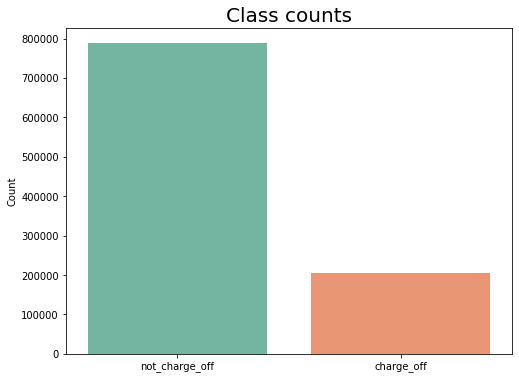

In [ ]:
neg = loans[loans["loan_status"] == 'Fully Paid'].shape[0] # charged off
pos = loans[loans["loan_status"] == 'Charged Off'].shape[0] # fully paid
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(loans["loan_status"], palette="Set2")
plt.xticks((0, 1), ["not_charge_off", "charge_off"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [ ]:
def new_dti(row):
    '''calculate new_dti = (dti*(annual_income/12) + installment) / (annual_incom/12)'''
    if row['annual_inc'] > 0:
      new_dti = (row['dti']*(row['annual_inc'] / 12) + row['installment']) / (row['annual_inc'] /12)
      return new_dti
    else :
      new_dti = (row['dti']*(1) + row['installment']) / (1)
      return new_dti
      
loans['new_dti'] = loans.apply(new_dti, axis=1)

# Data Prepocessing & Analysis

In [ ]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(loans.loc[loans[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loans[col_name], order=sorted(loans[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=loans, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = loans.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

In [ ]:
loans.columns

Index(['annual_inc', 'application_type', 'avg_cur_bal', 'dti', 'emp_length',
       'emp_title', 'fico_range_low', 'grade', 'home_ownership', 'installment',
       'int_rate', 'loan_amnt', 'loan_status', 'mort_acc',
       'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'verification_status', 'issue_d', 'last_pymnt_d',
       'open_acc', 'total_acc', 'addr_state', 'annual_inc_joint', 'dti_joint',
       'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_mort_acc',
       'sec_app_open_acc', 'new_dti'],
      dtype='object')

1. annual_inc

In [ ]:
# 1.annual_inc
print(loans['annual_inc'].describe())

count    9.939290e+05
mean     7.954268e+04
std      1.494380e+05
min      0.000000e+00
25%      4.700000e+04
50%      6.600000e+04
75%      9.500000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


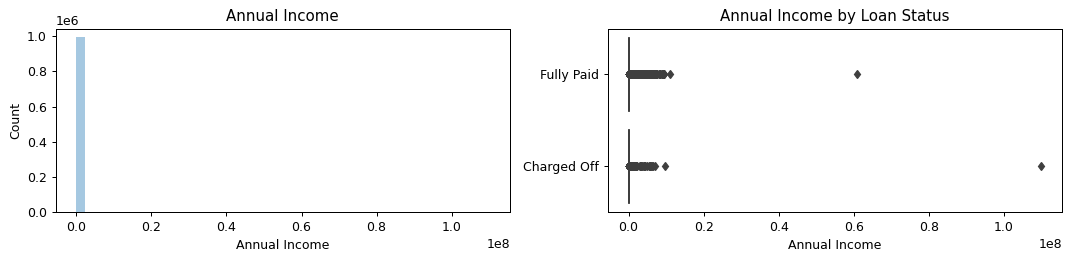

In [ ]:
plot_var('annual_inc', 'Annual Income', continuous=True)

In [ ]:
loans['log_annual_inc'] = loans['annual_inc'].apply(lambda x: np.log10(x+1))

In [ ]:
loans.drop('annual_inc', axis=1, inplace=True)

In [ ]:
loans['log_annual_inc'].describe()

count    993929.000000
mean          4.819808
std           0.294266
min           0.000000
25%           4.672107
50%           4.819551
75%           4.977728
max           8.041393
Name: log_annual_inc, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


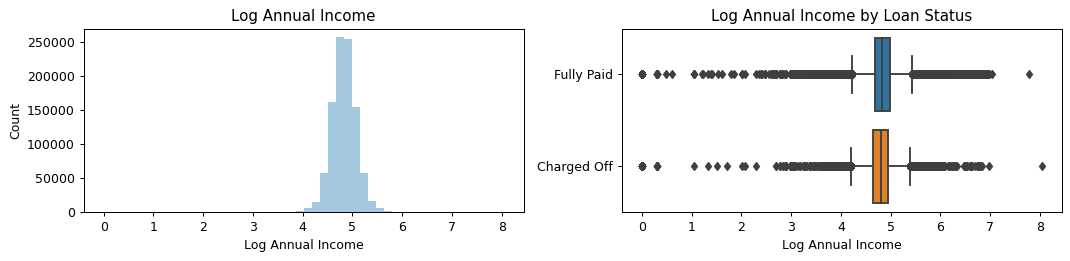

In [ ]:
plot_var('log_annual_inc', 'Log Annual Income', continuous=True)

In [ ]:
loans.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,205768.0,4.791363,0.290040,0.0,4.653222,4.795717,4.949395,8.041393
Fully Paid,788161.0,4.827234,0.294908,0.0,4.681250,4.832515,4.982276,7.785330


2. application_type

In [ ]:
# 2. application_type
loans['application_type'].value_counts()

Individual    924879
Joint App      69050
Name: application_type, dtype: int64

In [ ]:
loans.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

application_type
Individual    0.204095
Joint App     0.246271
Name: loan_status, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


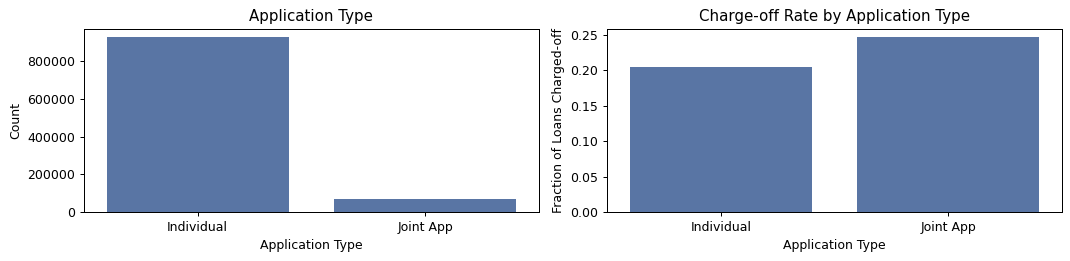

In [ ]:
plot_var('application_type', 'Application Type', continuous=False)

3. avg_cur_bal

In [ ]:
loans['avg_cur_bal'].describe()

count    993896.000000
mean      13818.346037
std       16933.638951
min           0.000000
25%        3072.000000
50%        7440.000000
75%       19128.000000
max      752994.000000
Name: avg_cur_bal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


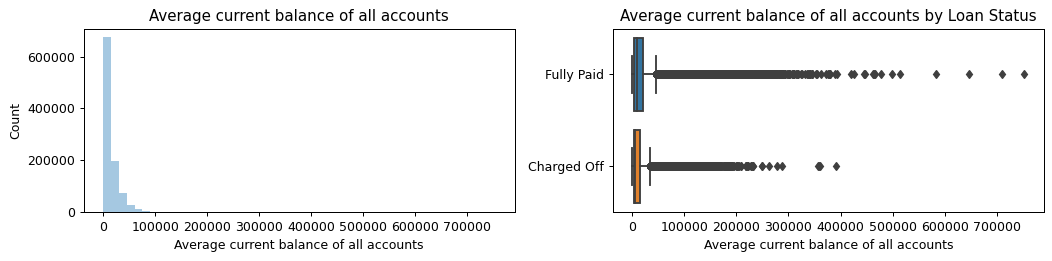

In [ ]:
plot_var('avg_cur_bal', 'Average current balance of all accounts', continuous=True)

In [ ]:
loans['log_avg_cur_bal'] = loans['avg_cur_bal'].apply(lambda x: np.log10(x+1))

In [ ]:
loans.drop('avg_cur_bal', axis=1, inplace=True)

In [ ]:
loans['log_avg_cur_bal'].describe()

count    993896.000000
mean          3.862554
std           0.535163
min           0.000000
25%           3.487563
50%           3.871631
75%           4.281692
max           5.876792
Name: log_avg_cur_bal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


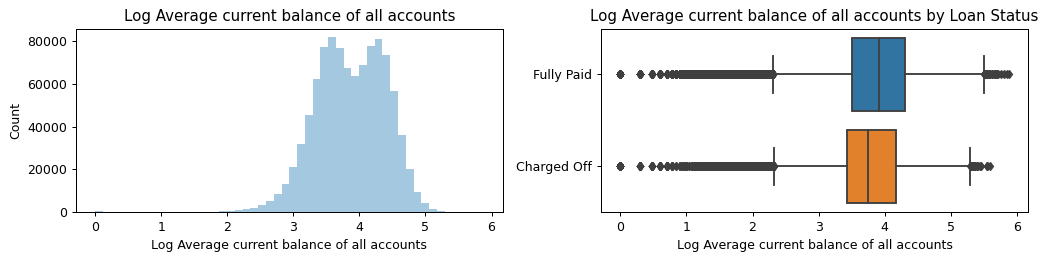

In [ ]:
plot_var('log_avg_cur_bal', 'Log Average current balance of all accounts', continuous=True)

4. dti

In [ ]:
loans['dti'].describe()

count    992823.000000
mean         18.989967
std          16.095942
min          -1.000000
25%          11.780000
50%          17.820000
75%          24.670000
max         999.000000
Name: dti, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Debt-to-income Ratio')

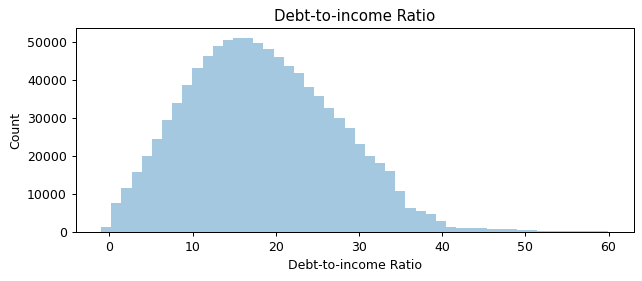

In [ ]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(loans.loc[loans['dti'].notnull() & (loans['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [ ]:
# dti outlier
(loans['dti']>=60).sum()

4851

In [ ]:
# filter dti < 60 
loans = loans.loc[loans['dti']<60]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


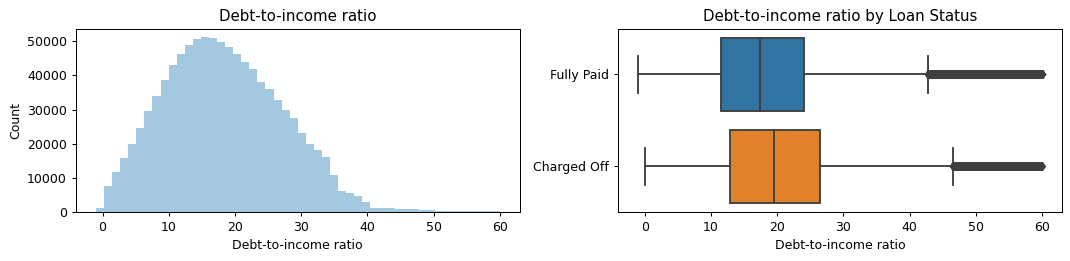

In [ ]:
plot_var('dti', 'Debt-to-income ratio', continuous=True)

In [ ]:
loans.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,204134.0,19.870031,9.447243,0.0,12.95,19.465,26.40,59.95
Current,1000953.0,19.521284,9.655355,0.0,12.47,18.650,25.69,59.99
Fully Paid,783838.0,18.077656,8.929438,-1.0,11.48,17.350,24.03,59.98


In [ ]:
loans['new_dti'].describe()

count    1.988925e+06
mean     1.907291e+01
std      9.587453e+00
min     -9.384362e-01
25%      1.217507e+01
50%      1.828310e+01
75%      2.520769e+01
max      1.307140e+03
Name: new_dti, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'New Debt-to-income Ratio')

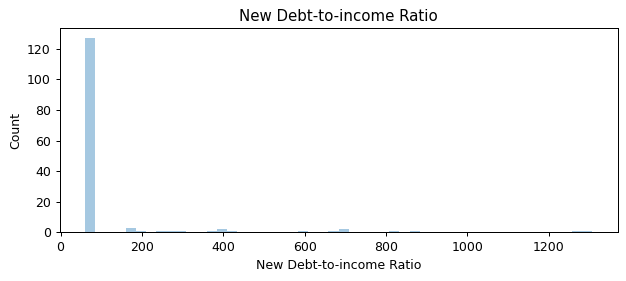

In [ ]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(loans.loc[loans['new_dti'].notnull() & (loans['new_dti']>60), 'new_dti'], kde=False)
plt.xlabel('New Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('New Debt-to-income Ratio')

In [ ]:
# dti outlier
(loans['new_dti']>60).sum()

146

In [ ]:
# filter new dti < 60 
loans = loans.loc[loans['new_dti']<60]

In [ ]:
loans.groupby('loan_status')['new_dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,204125.0,19.961055,9.456619,0.009451,13.034896,19.553484,26.488255,59.999076
Current,1000857.0,19.599193,9.663652,0.004633,12.536136,18.725073,25.775193,59.998976
Fully Paid,783797.0,18.150540,8.937516,-0.938436,11.542880,17.426369,24.106748,59.984536


5. emp_lenght

In [ ]:
loans['emp_length'].value_counts(dropna=False).sort_index()

1 year       134191
10+ years    642825
2 years      179360
3 years      158975
4 years      121070
5 years      124121
6 years       86070
7 years       70097
8 years       67495
9 years       59698
< 1 year     195173
NaN          149704
Name: emp_length, dtype: int64

In [ ]:
loans['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
loans['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [ ]:
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [ ]:
loans['emp_length'] = loans['emp_length'].apply(emp_length_to_int)

In [ ]:
loans['emp_length'].value_counts(dropna=False).sort_index()

0.0     195173
1.0     134191
2.0     179360
3.0     158975
4.0     121070
5.0     124121
6.0      86070
7.0      70097
8.0      67495
9.0      59698
10.0    642825
NaN     149704
Name: emp_length, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


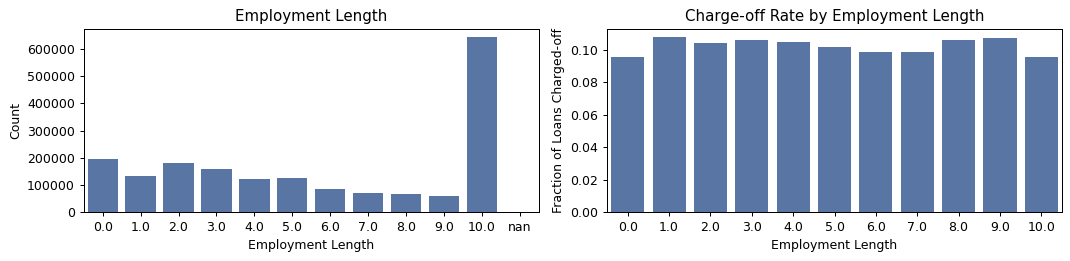

In [ ]:
plot_var('emp_length', 'Employment Length', continuous=False)

6. emp title

In [ ]:
loans['emp_title'].value_counts().head(10)

Teacher             35754
Manager             31912
Owner               18866
Driver              15701
Registered Nurse    14985
RN                  12850
Supervisor          12754
Sales               11616
Project Manager      9975
Office Manager       9061
Name: emp_title, dtype: int64

In [ ]:
loans['emp_title'].describe()

count     1789975
unique     360375
top       Teacher
freq        35754
Name: emp_title, dtype: object

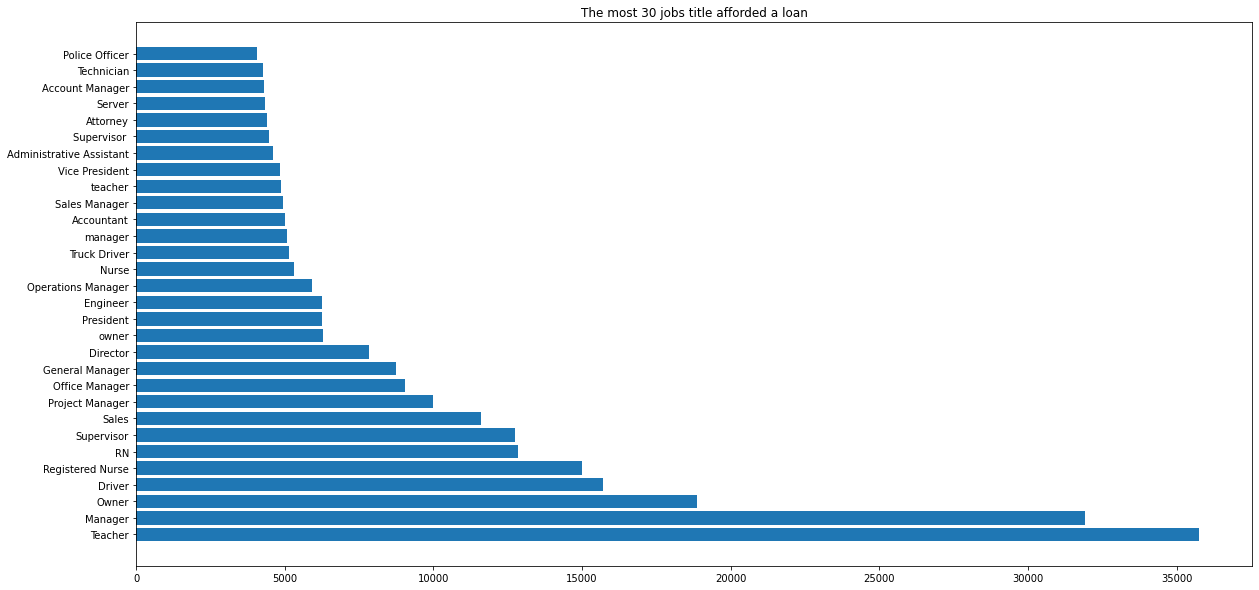

In [ ]:
# # group the detail of jobs to main jobs 
# loans['emp_title'] = loans.emp_title.str.lower()

# def manager(string):
#     if type(string) is str:
#         return 'manager' if 'manager' in string else string

# def president(string):
#     if type(string) is str:
#         return 'president' if 'president' in string else string
    
# def nurse(string):
#     if type(string) is str:
#         return 'nurse' if 'nurse' in string else string
    
# def driver(string):
#     if type(string) is str:
#         return 'driver' if 'driver' in string else string
    
# def assistant(string):
#     if type(string) is str:
#         return 'assistant' if 'assistant' in string else string

# def engineer(string):
#     if type(string) is str:
#         return 'engineer' if 'engineer' in string else string    

# functions = [manager, president, nurse, driver, assistant, engineer]
# for func in functions:
#     loans['emp_title'] = loans.emp_title.apply(func)

# graph plot
plt.figure(figsize=(20, 10))

plt.barh(loans.emp_title.value_counts()[:30].index, loans.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.show()

In [ ]:
loans.groupby('emp_title')['loan_status'].value_counts().loc[:,'Charged Off'].sort_values(ascending=False)

emp_title
Manager                            3679
Teacher                            3259
Owner                              2829
Driver                             2269
Sales                              1485
                                   ... 
Quality assurance coordinator         1
Quality assurance Specialist II       1
Quality assembly                      1
Quality annalist                      1
\tDrug Test Administrator             1
Name: loan_status, Length: 61749, dtype: int64

In [ ]:
# loans.drop('emp_title', axis=1, inplace=True)

7. fico score

In [ ]:
loans['fico_range_low'].describe()

count    1.988779e+06
mean     7.029383e+02
std      3.484314e+01
min      6.600000e+02
25%      6.750000e+02
50%      6.950000e+02
75%      7.200000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


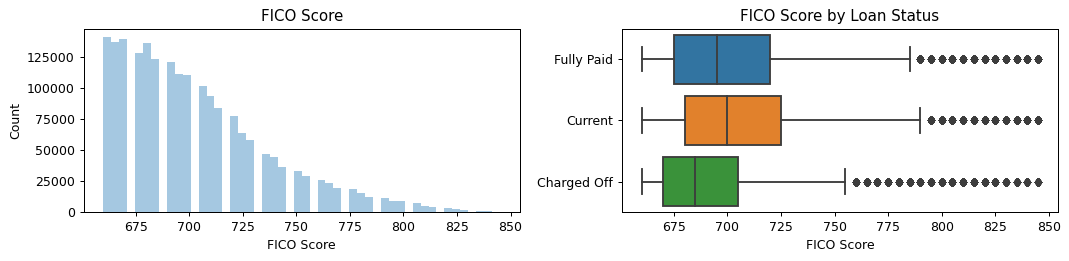

In [ ]:
plot_var('fico_range_low', 'FICO Score', continuous=True)

8. grade

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


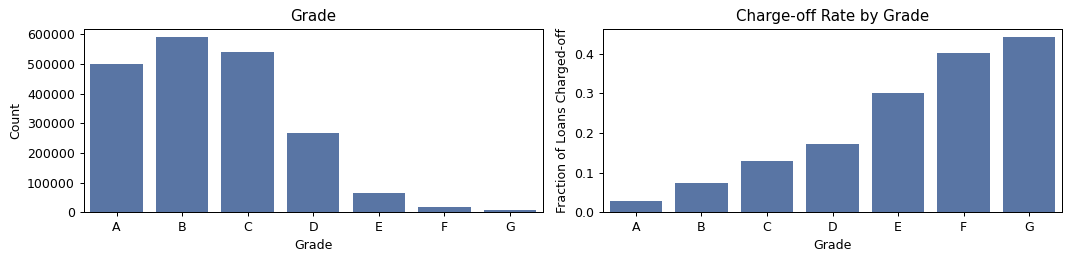

In [ ]:
# grade
plot_var('grade', 'Grade', continuous=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


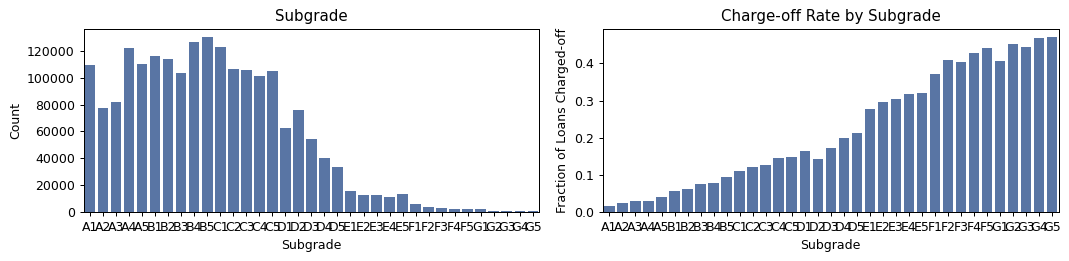

In [ ]:
plot_var('sub_grade', 'Subgrade', continuous=False)

9. home ownership

In [ ]:
# home ownership
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    967922
RENT        779221
OWN         238197
ANY           3436
NONE             3
Name: home_ownership, dtype: int64

In [ ]:
loans['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [ ]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    967922
RENT        779221
OWN         238197
OTHER         3439
Name: home_ownership, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


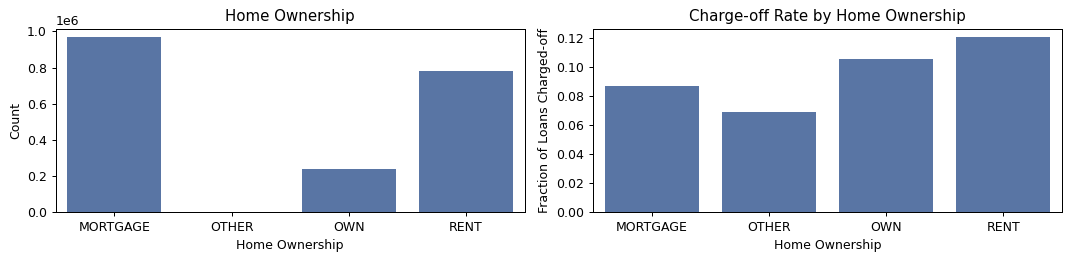

In [ ]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

10. installment

In [ ]:
# installment
loans['installment'].describe()

count    1.988779e+06
mean     4.572061e+02
std      2.834353e+02
min      7.610000e+00
25%      2.490800e+02
50%      3.805400e+02
75%      6.158900e+02
max      1.719830e+03
Name: installment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


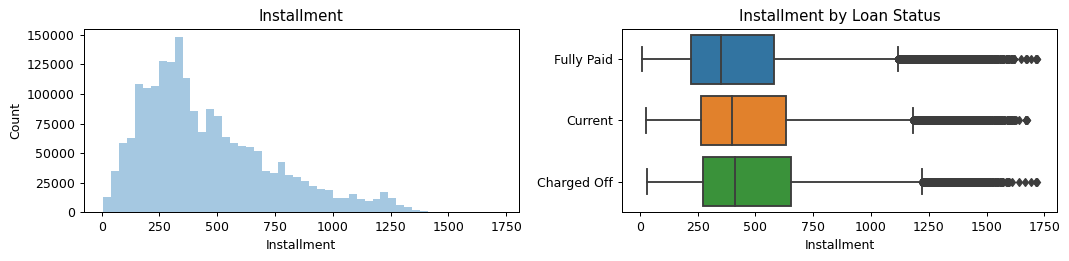

In [ ]:
plot_var('installment', 'Installment', continuous=True)

11. interest rate

count    1.988779e+06
mean     1.291574e+01
std      5.039256e+00
min      5.310000e+00
25%      8.810000e+00
50%      1.199000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


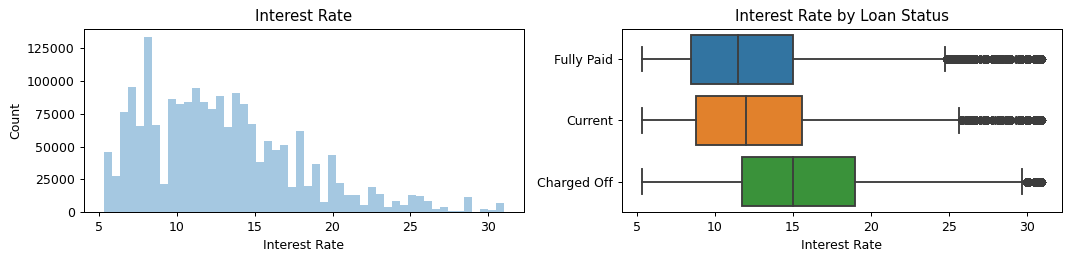

In [ ]:
print(loans['int_rate'].describe())
plot_var('int_rate', 'Interest Rate', continuous=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


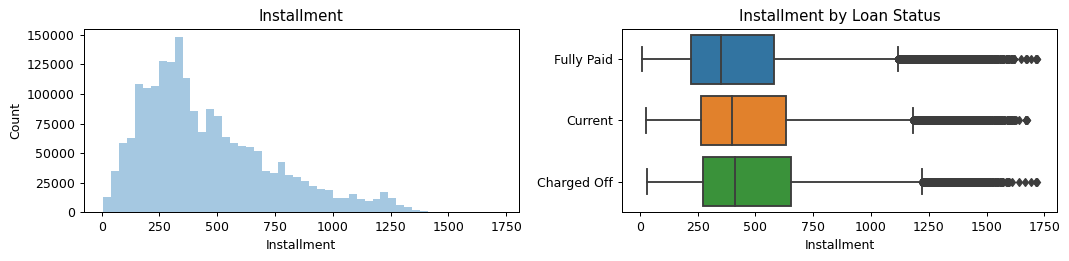

In [ ]:
plot_var('installment', 'Installment', continuous=True)

12. loan_amnt

count    1.988779e+06
mean     1.554777e+04
std      9.857283e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.300000e+04
75%      2.100000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


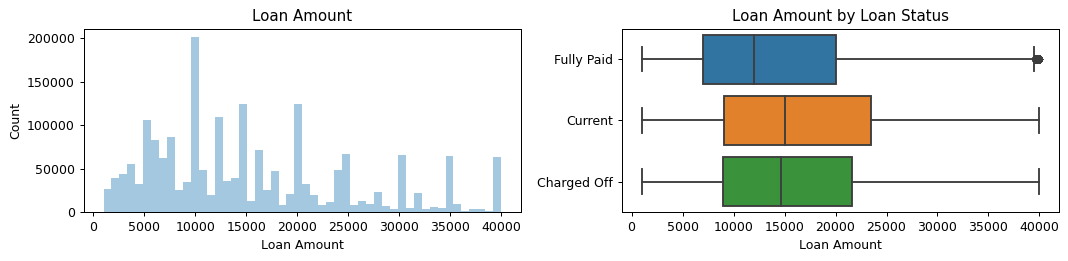

In [ ]:
# loan_amnt
print(loans['loan_amnt'].describe())
plot_var('loan_amnt', 'Loan Amount', continuous=True)

13. mort_acc

In [ ]:
# mort acc
loans['mort_acc'].describe()

count    1.988779e+06
mean     1.410972e+00
std      1.764273e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.400000e+01
Name: mort_acc, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


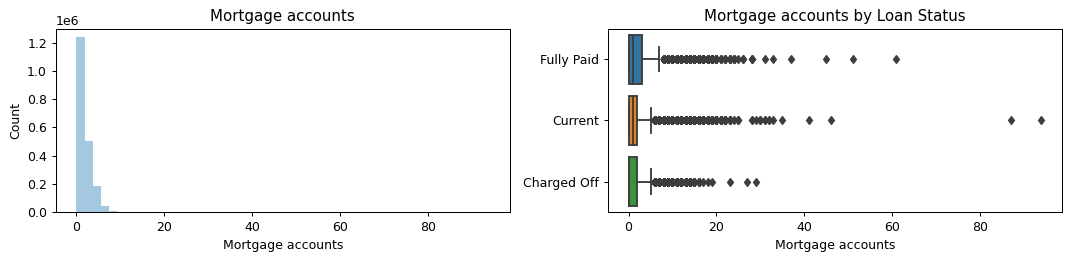

In [ ]:
plot_var('mort_acc', 'Mortgage accounts', continuous=True)

14. pub_rec_bankruptcies

In [ ]:
# pub_rec_bankruptcies
loans['pub_rec_bankruptcies'].value_counts().sort_index()

0.0    1752445
1.0     228147
2.0       6472
3.0       1225
4.0        330
5.0        108
6.0         37
7.0         10
8.0          4
9.0          1
Name: pub_rec_bankruptcies, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


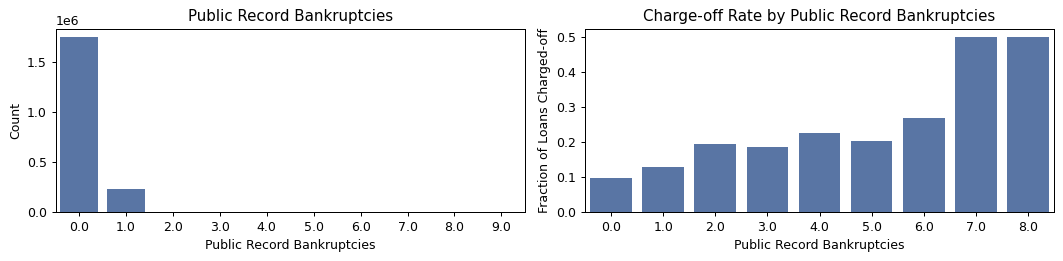

In [ ]:
plot_var('pub_rec_bankruptcies', 'Public Record Bankruptcies', continuous=False)

15. Purpose

In [ ]:
loans.purpose.value_counts()

debt_consolidation    1085216
credit_card            478689
home_improvement       137779
other                  131576
major_purchase          44457
medical                 26102
car                     20583
small_business          19091
house                   15490
vacation                15187
moving                  13433
renewable_energy         1167
wedding                     8
educational                 1
Name: purpose, dtype: int64

In [ ]:
loans.groupby('purpose')['loan_status'].value_counts().loc[:,'Charged Off'].sort_values(ascending=False)

purpose
debt_consolidation    119791
credit_card            38792
other                  14538
home_improvement       13004
major_purchase          4972
small_business          3157
medical                 2974
moving                  1783
house                   1710
car                     1694
vacation                1560
renewable_energy         148
wedding                    2
Name: loan_status, dtype: int64

16. revol_bal

In [ ]:
loans['revol_bal'].describe()

count    1.988779e+06
mean     1.693657e+04
std      2.315777e+04
min      0.000000e+00
25%      5.786000e+03
50%      1.129900e+04
75%      2.050500e+04
max      2.559552e+06
Name: revol_bal, dtype: float64

In [ ]:
loans['log_revol_bal'] = loans['revol_bal'].apply(lambda x: np.log10(x+1))

In [ ]:
loans.drop('revol_bal', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


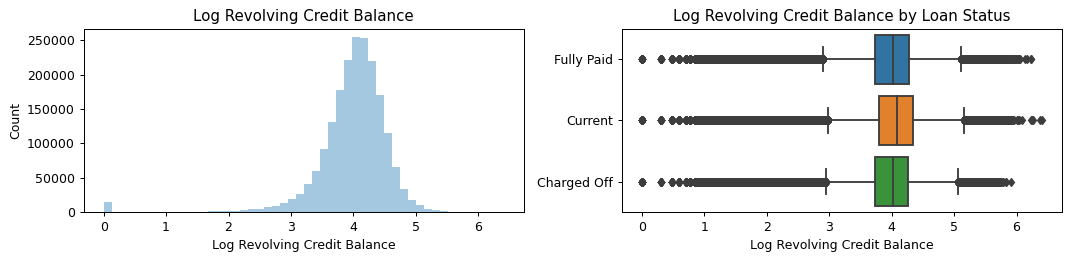

In [ ]:
plot_var('log_revol_bal', 'Log Revolving Credit Balance', continuous=True)

17. revol_until

In [ ]:
# revol_util
loans['revol_util'].describe()

count    1.986705e+06
mean     4.627015e+01
std      2.487923e+01
min      0.000000e+00
25%      2.680000e+01
50%      4.500000e+01
75%      6.500000e+01
max      1.910000e+02
Name: revol_util, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


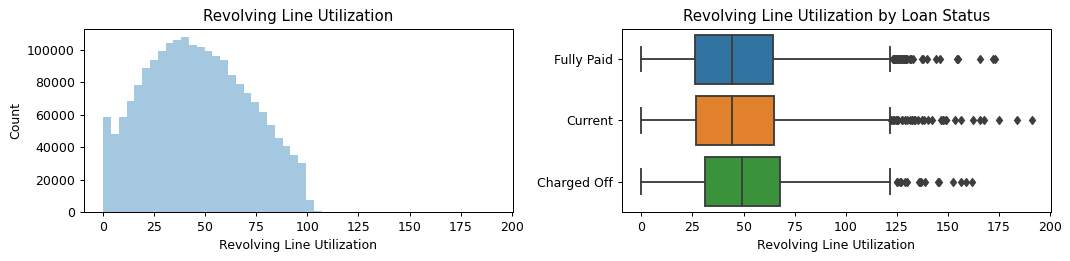

In [ ]:
plot_var('revol_util', 'Revolving Line Utilization', continuous=True)

18. term

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


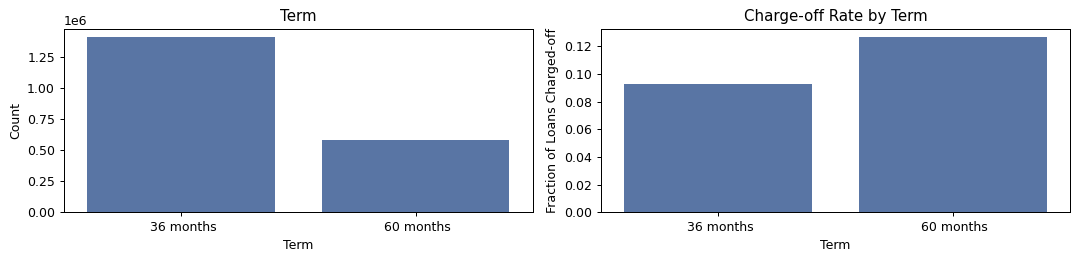

In [ ]:
plot_var('term', 'Term', continuous=False)

In [ ]:
loans.groupby('term')['loan_status'].value_counts()

term        loan_status
 36 months  Fully Paid     639983
            Current        638926
            Charged Off    130857
 60 months  Current        361931
            Fully Paid     143814
            Charged Off     73268
Name: loan_status, dtype: int64

19. verification

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


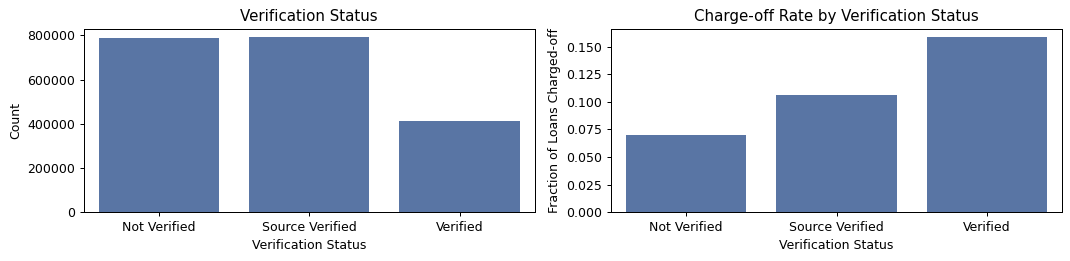

In [ ]:
plot_var('verification_status', 'Verification Status', continuous=False)

In [ ]:
loans.verification_status.value_counts()

Source Verified    791213
Not Verified       786746
Verified           410820
Name: verification_status, dtype: int64

20. open acc

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Open Credit')

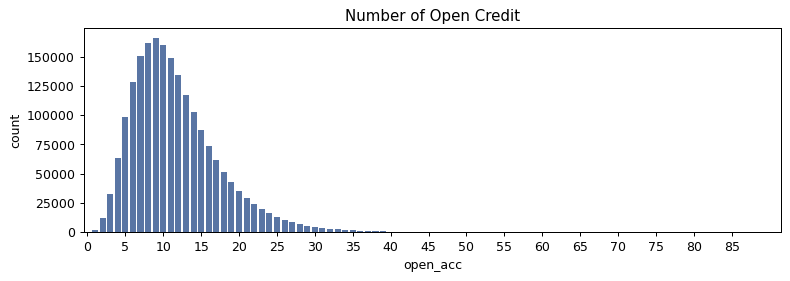

In [ ]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(loans['open_acc'], order=sorted(loans['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit')

In [ ]:
loans.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,204125.0,11.800975,5.896091,0.0,8.0,11.0,15.0,78.0
Current,1000857.0,11.789712,5.998695,0.0,8.0,11.0,15.0,104.0
Fully Paid,783797.0,11.634687,5.777973,0.0,8.0,11.0,15.0,88.0


21. total_acc

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Number of Credit Lines')

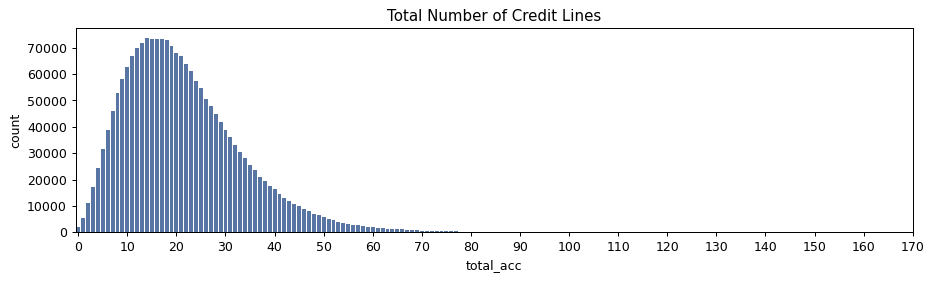

In [ ]:
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(loans['total_acc'], order=sorted(loans['total_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

In [ ]:
loans.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,204125.0,23.364835,12.192591,2.0,14.0,21.0,30.0,176.0
Current,1000857.0,22.958889,12.058748,2.0,14.0,21.0,29.0,171.0
Fully Paid,783797.0,24.176511,12.192346,2.0,15.0,22.0,31.0,165.0


## Data Imputation

In [ ]:
loans.columns

Index(['application_type', 'dti', 'emp_length', 'emp_title', 'fico_range_low',
       'grade', 'home_ownership', 'installment', 'int_rate', 'loan_amnt',
       'loan_status', 'mort_acc', 'pub_rec_bankruptcies', 'purpose',
       'revol_util', 'sub_grade', 'term', 'verification_status', 'issue_d',
       'last_pymnt_d', 'open_acc', 'total_acc', 'addr_state',
       'annual_inc_joint', 'dti_joint', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_mort_acc', 'sec_app_open_acc',
       'new_dti', 'log_annual_inc', 'log_avg_cur_bal', 'log_revol_bal'],
      dtype='object')

<BarContainer object of 33 artists>

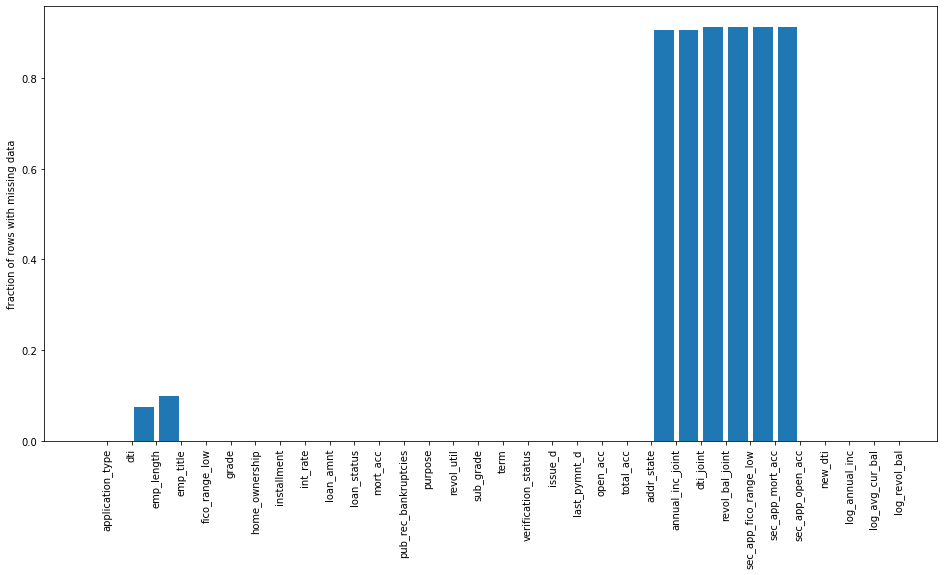

In [ ]:
null_counts = loans.isnull().sum()/len(loans)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation=90)
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [ ]:
# numerical columns
col_to_drop = ['annual_inc_joint', 'dti_joint',
              'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_mort_acc',
              'sec_app_open_acc']

loans = loans.drop(columns=col_to_drop)
loans = loans.dropna()
# fill_mean = ['revol_util', 'percent_bc_gt_75', 'avg_cur_bal', 'dti', 'inq_last_6mths']
# df_sample[fill_mean] = df_sample[fill_mean].fillna(df_sample.mean())

# # catagorical columns 
# cat_fill_0 = ['emp_length', 'emp_title']
# df_sample[cat_fill_0] = df_sample[cat_fill_0].fillna(value=0)

In [ ]:
loans.shape

(1785449, 27)

In [ ]:
print(f"{loans.isnull().sum()}")

application_type        0
dti                     0
emp_length              0
emp_title               0
fico_range_low          0
grade                   0
home_ownership          0
installment             0
int_rate                0
loan_amnt               0
loan_status             0
mort_acc                0
pub_rec_bankruptcies    0
purpose                 0
revol_util              0
sub_grade               0
term                    0
verification_status     0
issue_d                 0
last_pymnt_d            0
open_acc                0
total_acc               0
addr_state              0
new_dti                 0
log_annual_inc          0
log_avg_cur_bal         0
log_revol_bal           0
dtype: int64


In [ ]:
# # plot outlier
# col = ['annual_inc', 'avg_cur_bal', 'installment', 'int_rate', 'mort_acc', 'percent_bc_gt_75', 
#       'revol_bal', 'fico_range_low', 'dti', 'revol_bal', 'revol_util']

# # create boxplot with a different y scale for different rows
# fig, axes = plt.subplots(1, len(col), figsize=(40, len(col)))
# for i, colx in enumerate(col):
#     ax = sns.boxplot(y=df_sample[colx], ax=axes.flatten()[i])
#     ax.set_ylim(df_sample[colx].min(), df_sample[colx].max())
#     ax.set_ylabel(colx + ' / Unit')
# plt.show()

In [ ]:
# from scipy import stats
# z_scores = stats.zscore(df_sample[col])
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# df_sample = df_sample[filtered_entries]
# df_sample

In [ ]:
# # plot outlier
# col = ['annual_inc', 'avg_cur_bal', 'installment', 'int_rate', 'mort_acc', 'percent_bc_gt_75', 
#       'revol_bal', 'fico_range_low', 'dti', 'revol_bal', 'revol_util']

# # create boxplot with a different y scale for different rows
# fig, axes = plt.subplots(1, len(col), figsize=(40, len(col)))
# for i, colx in enumerate(col):
#     ax = sns.boxplot(y=df_sample[colx], ax=axes.flatten()[i])
#     ax.set_ylim(df_sample[colx].min(), df_sample[colx].max())
#     ax.set_ylabel(colx + ' / Unit')
# plt.show()

## Feature Tranformation

In [ ]:
# check numerical columns 
cred_num = loans.select_dtypes(include=['object'])
cred_num.columns

Index(['application_type', 'emp_title', 'grade', 'home_ownership',
       'loan_status', 'purpose', 'sub_grade', 'term', 'verification_status',
       'issue_d', 'last_pymnt_d', 'addr_state'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#convert tanget values
loans['loan_status'] = loans.loan_status.map({'Fully Paid':0, 'Charged Off':1, 'Current':2})

cat_col = ['application_type', 'grade', 'home_ownership', 'purpose',
          'sub_grade', 'term', 'verification_status']

num_col = ['dti', 'fico_range_low', 'installment','int_rate', 'loan_amnt',
          'revol_util', 'new_dti', 'log_annual_inc','log_avg_cur_bal', 'log_revol_bal']

# label encoding
enc = OrdinalEncoder()
loans[cat_col] = enc.fit_transform(loans[cat_col].astype(str))

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
loans[num_col] = scaler.fit_transform(loans[num_col])

In [ ]:
loans

,application_type,dti,emp_length,emp_title,fico_range_low,grade,home_ownership,installment,int_rate,loan_amnt,loan_status,mort_acc,pub_rec_bankruptcies,purpose,revol_util,sub_grade,term,verification_status,issue_d,last_pymnt_d,open_acc,total_acc,addr_state,new_dti,log_annual_inc,log_avg_cur_bal,log_revol_bal
0,0.0,0.951310,10.0,associate,0.362414,0.0,2.0,-0.305863,-0.980121,-0.381157,0,0.0,1.0,2.0,-0.390319,4.0,0.0,1.0,2017-09-01,2020-05-01,9.0,16.0,CA,0.953194,-0.990269,-0.683297,0.109304
1,0.0,-0.712379,10.0,Nurse,0.362414,1.0,0.0,2.114551,-0.182262,1.643857,2,3.0,0.0,1.0,-0.507147,9.0,0.0,1.0,2017-09-01,2020-05-01,20.0,42.0,NJ,-0.710844,1.426055,0.905788,1.204156
2,0.0,1.315614,9.0,Driver,1.814426,2.0,0.0,1.726696,0.425064,2.453863,2,4.0,0.0,2.0,-1.046969,13.0,1.0,2.0,2017-09-01,2020-05-01,12.0,26.0,TX,1.315671,0.952442,0.833561,0.227862
3,0.0,-0.324293,5.0,Senior Investigator,-0.073189,0.0,3.0,0.135663,-0.980121,0.023846,2,0.0,0.0,2.0,0.443585,4.0,0.0,0.0,2017-09-01,2020-05-01,12.0,20.0,VA,-0.323980,0.180645,0.281945,0.373655
5,0.0,-0.721027,10.0,CSM,0.217213,0.0,3.0,-0.857798,-0.980121,-0.887411,2,0.0,1.0,2.0,-0.962370,4.0,0.0,1.0,2017-09-01,2020-05-01,13.0,20.0,IL,-0.719485,-1.493481,-2.073759,-0.189469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038047,0.0,-0.788050,0.0,Senior Escrow Officer,-0.944397,4.0,3.0,0.802164,2.199408,0.833852,1,0.0,1.0,9.0,-0.877771,21.0,1.0,1.0,2017-04-01,2018-03-01,13.0,24.0,CO,-0.786932,0.740256,-0.273002,-0.018291
2038048,0.0,0.065955,10.0,Rn,0.652817,0.0,0.0,-0.526327,-0.976152,-0.583659,0,0.0,0.0,2.0,-1.248395,4.0,0.0,1.0,2017-04-01,2019-10-01,15.0,27.0,PA,0.063748,-0.182120,-0.604256,-0.013360
2038049,0.0,0.175138,8.0,Sales Associate,0.072012,3.0,3.0,-0.367957,0.810100,-0.578596,1,0.0,0.0,2.0,0.012533,15.0,0.0,0.0,2017-04-01,2019-05-01,15.0,21.0,VA,0.179074,-1.224823,-1.689012,0.277944
2038050,0.0,0.113520,5.0,Contact input,-0.944397,1.0,3.0,-0.933812,-0.291422,-0.988662,0,0.0,0.0,1.0,-1.473993,8.0,0.0,1.0,2017-04-01,2019-01-01,9.0,18.0,NY,0.111247,-1.034862,-0.711988,-1.513942


In [ ]:
# cur_loans = loans.loc[loans['loan_status'].isin(['2'])]

In [ ]:
# cur_loans.to_csv('/content/drive/MyDrive/Independent Study/Dataset/cur_loans.csv')

In [ ]:
# loans.to_csv('/content/drive/MyDrive/Independent Study/Dataset/data_preparation_v2.csv', index=False)

In [ ]:
df_model = pd.read_csv('/content/drive/MyDrive/Independent Study/Dataset/data_preparation_v2.csv')

In [ ]:
df_model.shape

(914173, 26)

## Feature Selection

(639921, 22) (274252, 22) (639921,) (274252,)
{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}


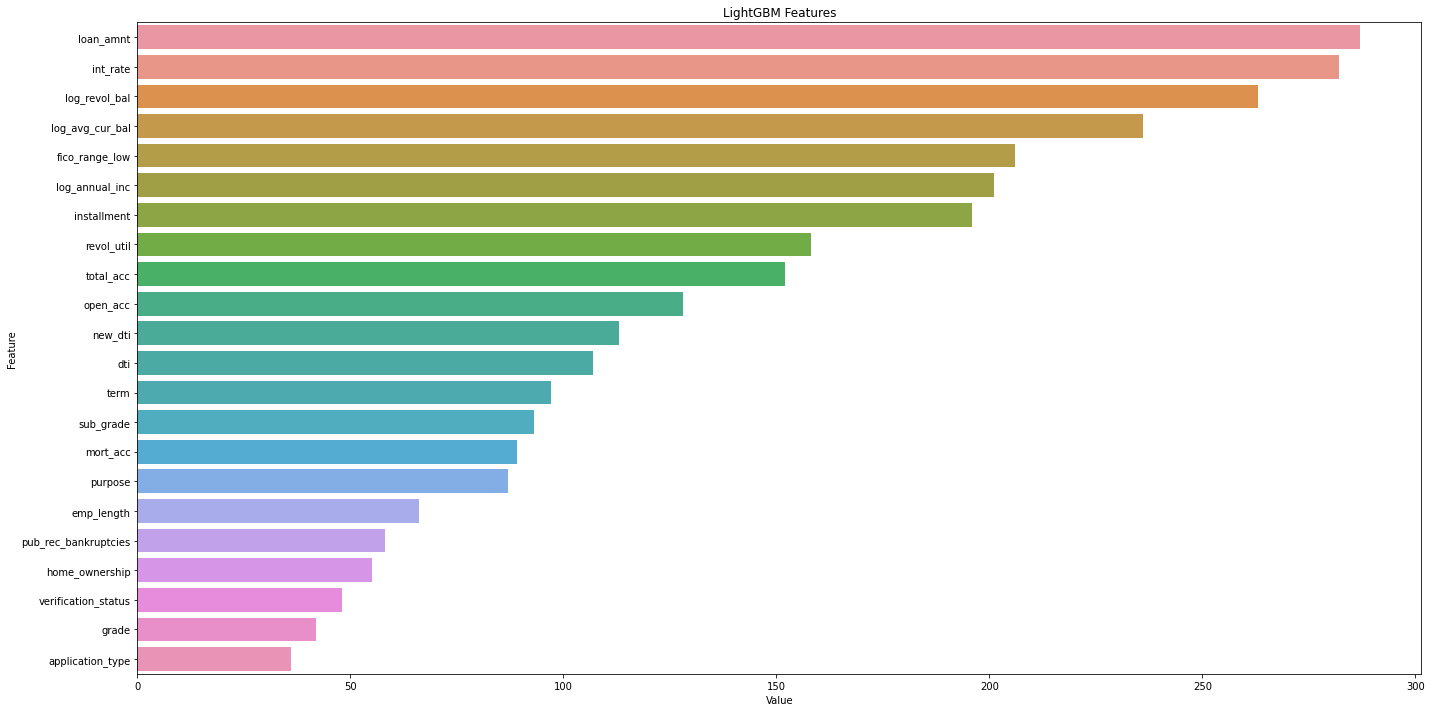

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.preprocessing import StandardScaler

X = df_model.drop(columns=['loan_status', 'issue_d', 'last_pymnt_d', 'avg_cur_bal'])
y = df_model['loan_status']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print(X_train.shape , X_test.shape, y_train.shape, y_test.shape)

# parameter setup
parameters = {
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [7, 15, 31],
}

model_lgbm = LGBMClassifier(class_weight='balanced')
best = GridSearchCV(model_lgbm, param_grid=parameters)
best.fit(X_train, y_train)
print(best.best_params_)

# plot feature importance 
warnings.simplefilter(action='ignore', category=FutureWarning)

sorted(zip(best.best_estimator_.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(best.best_estimator_.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


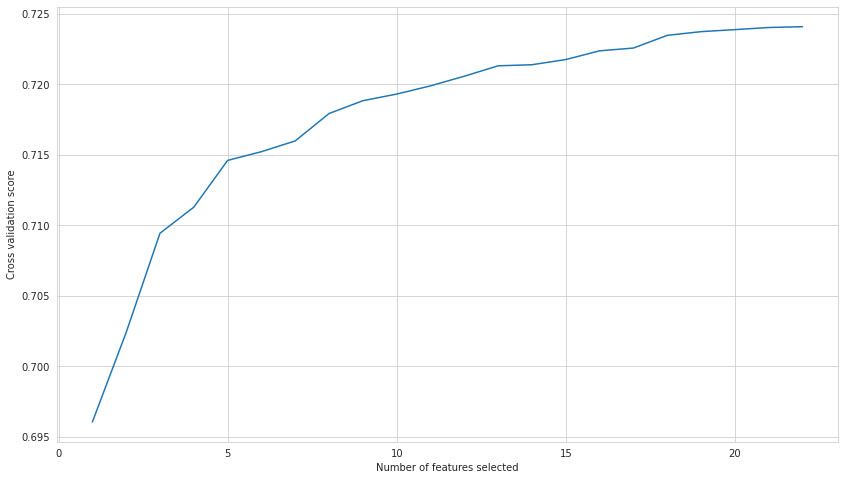

In [ ]:
from sklearn.feature_selection import RFECV

# RFECV
rfe = RFECV(estimator=best.best_estimator_, step=1, cv=5, scoring='roc_auc', verbose=2)
rfe = rfe.fit(X_train, y_train)

#Ranking feature
all_features = [x for x in X.columns]
print('\n Optimal number of features: %d' % rfe.n_features_)
sel_features = [f for f, s in zip(all_features, rfe.support_) if s]
print('\n The selected features are {}:'.format(sel_features))

ranking = pd.DataFrame({'Features': all_features})
ranking['Rank'] = np.asarray(rfe.ranking_)
ranking.sort_values('Rank', inplace=True)
print(ranking)

# plot tuning
print('Optimal number of features:', rfe.n_features_)
plt.figure(figsize=(14, 8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [ ]:
# feature select 
from sklearn.model_selection import train_test_split
select_feature = ['dti', 'emp_length', 'fico_range_low', 
                  'home_ownership', 'installment', 'int_rate', 'loan_amnt', 'mort_acc',
                  'pub_rec_bankruptcies', 'purpose', 'revol_util', 'sub_grade', 'term', 
                  'verification_status', 'open_acc', 'total_acc', 'new_dti', 'log_annual_inc', 
                  'log_avg_cur_bal', 'log_revol_bal']

X_fs = df_model[select_feature]
y = df_model['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.3, random_state=0, stratify=y)
print(X_train.shape , X_test.shape, y_train.shape, y_test.shape)

(639921, 20) (274252, 20) (639921,) (274252,)


# Model setup

In [ ]:
pip install catboost

     |████████████████████████████████| 69.2 MB 9.2 kB/s 


In [ ]:
# model setup
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

def model(X, y):
  names = [
              "Logistic Regression",
              "Decision Tree",
              "Random Forest",
              "XGB",
              "CatBoost",
              "LightGBM",
              "MLPClassifier"
          ]

  classifiers = [
                  LogisticRegression(),
                  DecisionTreeClassifier(),
                  RandomForestClassifier(),
                  XGBClassifier(),
                  CatBoostClassifier(),
                  LGBMClassifier(),
                  MLPClassifier()
                ]

  parameter = [   
                  # Logistic Regression
                  {"C": np.logspace(-3,3,7), "penalty": ["l1","l2"]},
                  # Decision Tree 
                  {'max_depth' : [2, 4, 6, 8, 10], 'min_samples_leaf': [20, 40, 60 ,100],
                    'criterion' :['gini', 'entropy']},
                  # Random Forest
                  {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [2, 4, 6, 8, 10], 'criterion' :['gini', 'entropy']},
                  # XGB
                  {'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0],
                  'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]},
                  # Catboost
                  {'depth' : [2, 4, 6, 8, 10], 'learning_rate' : [0.01, 0.02, 0.03, 0.04],
                  'iterations': [50, 100, 200, 300]},
                  # LightGBM
                  {'num_leaves': [31, 127], 'reg_alpha': [0.1, 0.5], 'min_data_in_leaf': [20, 40, 60, 100],
                  'lambda_l1': [0, 1, 1.5], 'lambda_l2': [0, 1]},
                  # ANN 
                  {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], 'activation': ['tanh', 'relu'],
                  'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']}
              ]

  # Logging for Visual Comparison
  log_cols=["Classifier", "Accuracy", "Precision", "Recall", "F1_Score", "ROC_AUC", "fpr", "tpr"]
  log = pd.DataFrame(columns=log_cols)


  for name, clf, params in zip(names, classifiers, parameter):
      gs_clf = RandomizedSearchCV(clf, param_distributions=params, n_jobs=-1, cv=5) # use RandomSearch tuning
      clf = gs_clf.fit(X, y) # fit model  
      
      print("="*30)
      print(name)
      print(clf.best_params_)
      print('****train****') # train prediction
      train_predictions = clf.predict(X_train)
      # accuracy: (tp + tn) / (p + n)
      acc_train = accuracy_score(y_train, train_predictions)
      print("Accuracy: {:.2%}".format(acc_train))
      # precision tp / (tp + fp)
      precision_train = precision_score(y_train, train_predictions)
      print("Precision: {:.2%}".format(precision_train))
      # recall: tp / (tp + fn)
      recall_train = recall_score(y_train, train_predictions)
      print("Recall: {:.2%}".format(recall_train))
      # f1: 2 tp / (2 tp + fp + fn)
      f1_train = f1_score(y_train, train_predictions)
      print("F1: {:.2%}".format(f1_train))
      auc_train = roc_auc_score(y_train, train_predictions)
      print("AUC: {:.2%}".format(auc_train))
      # confusion matrix
      matrix_train = confusion_matrix(y_train, train_predictions)
      print(matrix_train, '\n')
      
      print('****test****') # test prediction
      test_predictions = clf.predict(X_test)
      # accuracy: (tp + tn) / (p + n)
      acc = accuracy_score(y_test, test_predictions)
      print("Accuracy: {:.2%}".format(acc))
      # precision tp / (tp + fp)
      precision = precision_score(y_test, test_predictions)
      print("Precision: {:.2%}".format(precision))
      # recall: tp / (tp + fn)
      recall = recall_score(y_test, test_predictions)
      print("Recall: {:.2%}".format(recall))
      # f1: 2 tp / (2 tp + fp + fn)
      f1 = f1_score(y_test, test_predictions)
      print("F1 Score: {:.2%}".format(f1))
      auc = roc_auc_score(y_test, test_predictions)
      fpr, tpr, _ = roc_curve(y_test,  test_predictions)
      print("AUC: {:.2%}".format(auc))
      # confusion matrix
      matrix = confusion_matrix(y_test, test_predictions)
      print(matrix)

      log_entry = pd.DataFrame([[name, acc*100, precision*100, recall*100, f1*100, auc*100, fpr, tpr]], columns=log_cols)
      log = log.append(log_entry)
      
  # Set name of the classifiers as index labels
  log.set_index('Classifier', inplace=True)
  print("="*30)


  # Compare model 
  # accuracy
  sns.set_color_codes("muted")
  sns.barplot(x='Accuracy', y=log.index, data=log, color="b")

  plt.xlabel('Accuracy %')
  plt.title('Classifier Accuracy')
  plt.show()

  # precision
  sns.set_color_codes("muted")
  sns.barplot(x='Precision', y=log.index, data=log, color="g")

  plt.xlabel('Precision')
  plt.title('Classifier Precision')
  plt.show()

  # recall
  sns.set_color_codes("muted")
  sns.barplot(x='Recall', y=log.index, data=log, color="r")

  plt.xlabel('Recall')
  plt.title('Classifier Recall')
  plt.show()

  # f1 score
  sns.set_color_codes("muted")
  sns.barplot(x='F1_Score', y=log.index, data=log, color="y")

  plt.xlabel('F1_Score')
  plt.title('Classifier F1_Score')
  plt.show()

  # auc_roc 
  sns.set_color_codes("muted")
  sns.barplot(x='ROC_AUC', y=log.index, data=log, color="salmon")

  plt.xlabel('ROC_AUC')
  plt.title('Classifier ROC_AUC')
  plt.show()

  # ROC plot multiple model
  fig = plt.figure(figsize=(8,6))

  for i in log.index:
      plt.plot(log.loc[i]['fpr'], 
              log.loc[i]['tpr'], 
              label="{}, AUC={:.3f}".format(i, log.loc[i]['ROC_AUC']))
      
  plt.plot([0,1], [0,1], color='orange', linestyle='--')

  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("Flase Positive Rate", fontsize=15)

  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)

  plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')

  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression
{'penalty': 'l2', 'C': 0.001}
****train****
Accuracy: 80.33%
Precision: 53.47%
Recall: 8.73%
F1: 15.00%
AUC: 53.42%
[[502912   9668]
 [116230  11111]] 

****test****
Accuracy: 80.30%
Precision: 53.16%
Recall: 8.62%
F1 Score: 14.84%
AUC: 53.37%
[[215530   4147]
 [ 49868   4707]]


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Decision Tree
{'min_samples_leaf': 100, 'max_depth': 8, 'criterion': 'gini'}
****train****
Accuracy: 80.42%
Precision: 56.19%
Recall: 7.28%
F1: 12.89%
AUC: 52.94%
[[505350   7230]
 [118068   9273]] 

****test****
Accuracy: 80.26%
Precision: 53.06%
Recall: 6.85%
F1 Score: 12.14%
AUC: 52.67%
[[216369   3308]
 [ 50836   3739]]
Random Forest
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}
****train****
Accuracy: 80.52%
Precision: 63.04%
Recall: 5.08%
F1: 9.41%
AUC: 52.17%
[[508786   3794]
 [120869   6472]] 

****test****
Accuracy: 80.36%
Precision: 58.22%
Recall: 4.58%
F1 Score: 8.50%
AUC: 51.88%
[[217882   1795]
 [ 52074   2501]]


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


XGB
{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 0.8}
****train****
Accuracy: 80.59%
Precision: 58.45%
Recall: 8.55%
F1: 14.92%
AUC: 53.52%
[[504836   7744]
 [116449  10892]] 

****test****
Accuracy: 80.53%
Precision: 57.46%
Recall: 8.30%
F1 Score: 14.50%
AUC: 53.39%
[[216325   3352]
 [ 50047   4528]]


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 0.6764939	total: 129ms	remaining: 25.6s
1:	learn: 0.6615897	total: 253ms	remaining: 25s
2:	learn: 0.6471306	total: 380ms	remaining: 24.9s
3:	learn: 0.6338876	total: 507ms	remaining: 24.9s
4:	learn: 0.6214909	total: 624ms	remaining: 24.3s
5:	learn: 0.6100122	total: 753ms	remaining: 24.4s
6:	learn: 0.5996872	total: 885ms	remaining: 24.4s
7:	learn: 0.5895927	total: 1.01s	remaining: 24.3s
8:	learn: 0.5802529	total: 1.14s	remaining: 24.2s
9:	learn: 0.5718913	total: 1.27s	remaining: 24.1s
10:	learn: 0.5638346	total: 1.4s	remaining: 24s
11:	learn: 0.5567170	total: 1.52s	remaining: 23.8s
12:	learn: 0.5497021	total: 1.64s	remaining: 23.7s
13:	learn: 0.5432015	total: 1.77s	remaining: 23.5s
14:	learn: 0.5374129	total: 1.9s	remaining: 23.4s
15:	learn: 0.5320152	total: 2.03s	remaining: 23.4s
16:	learn: 0.5268246	total: 2.16s	remaining: 23.3s
17:	learn: 0.5223028	total: 2.28s	remaining: 23.1s
18:	learn: 0.5179270	total: 2.4s	remaining: 22.9s
19:	learn: 0.5138114	total: 2.53s	remaining: 22.

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


MLPClassifier
{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.05, 'activation': 'tanh'}
****train****
Accuracy: 80.46%
Precision: 57.27%
Recall: 7.20%
F1: 12.79%
AUC: 52.93%
[[505739   6841]
 [118172   9169]] 

****test****
Accuracy: 80.48%
Precision: 57.62%
Recall: 7.23%
F1 Score: 12.85%
AUC: 52.95%
[[216775   2902]
 [ 50629   3946]]


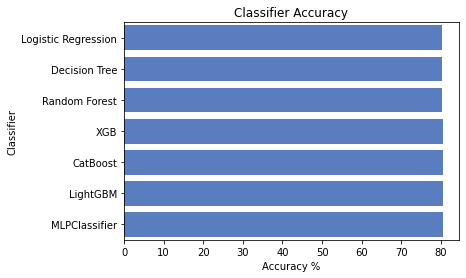

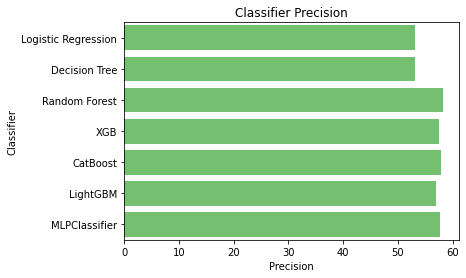

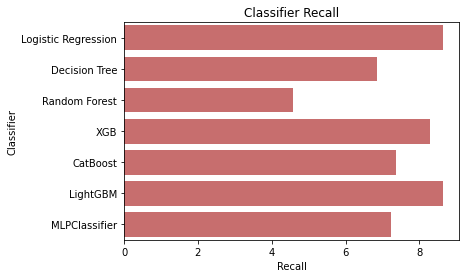

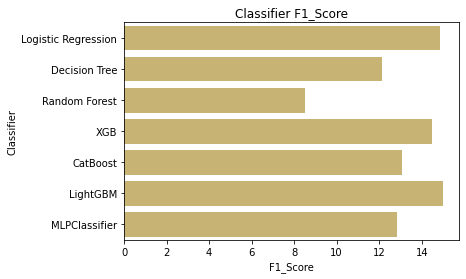

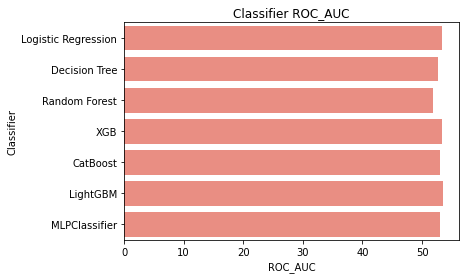

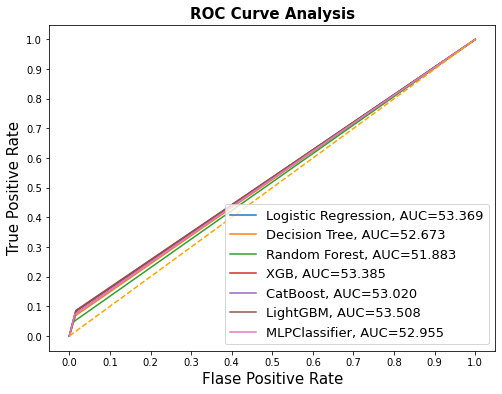

In [ ]:
model(X_train, y_train)

In [ ]:
# # save picture
# fig.savefig('multiple_roc_curve.png')

## Balance

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, InstanceHardnessThreshold
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.


In [ ]:
# balance setup
# X_train_rus, y_train_rus = RandomUnderSampler().fit_resample(X_train, y_train)
iht = InstanceHardnessThreshold(random_state=0, estimator=LogisticRegression(solver='lbfgs', multi_class='auto'))
X_train_iht, y_train_iht = iht.fit_resample(X_train, y_train)
# X_train_smote, y_train_smote = SMOTE(k_neighbors=5).fit_resample(X_train, y_train)
# X_train_ada, y_train_ada = ADASYN(n_neighbors=5).fit_resample(X_train, y_train)

print('Original data', sorted(Counter(y_train).items()))
# print('Under Sampling with rus', sorted(Counter(y_train_rus).items()))
print('Under Sampling with IHT', sorted(Counter(y_train_iht).items()))
# print('Over sampling with smote', sorted(Counter(y_train_smote).items()))
# print('Over sampling with adasyn', sorted(Counter(y_train_ada).items()))

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

Original data [(0, 512580), (1, 127341)]
Under Sampling with IHT [(0, 127341), (1, 127341)]


Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


### Under Sampling

##### RUS

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression
{'penalty': 'l2', 'C': 100.0}
****train****
Accuracy: 66.03%
Precision: 32.29%
Recall: 64.44%
F1: 43.02%
AUC: 65.43%
[[340490 172090]
 [ 45281  82060]] 

****test****
Accuracy: 65.83%
Precision: 32.10%
Recall: 64.27%
F1 Score: 42.81%
AUC: 65.24%
[[145474  74203]
 [ 19502  35073]]
Decision Tree
{'min_samples_leaf': 100, 'max_depth': 6, 'criterion': 'gini'}
****train****
Accuracy: 62.10%
Precision: 30.40%
Recall: 70.19%
F1: 42.43%
AUC: 65.14%
[[307990 204590]
 [ 37965  89376]] 

****test****
Accuracy: 61.81%
Precision: 30.16%
Recall: 69.86%
F1 Score: 42.13%
AUC: 64.83%
[[131379  88298]
 [ 16449  38126]]
Random Forest
{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}
****train****
Accuracy: 64.50%
Precision: 32.06%
Recall: 70.02%
F1: 43.98%
AUC: 66.58%
[[323613 188967]
 [ 38174  89167]] 

****test****
Accuracy: 63.81%
Precision: 31.30%
Recall: 68.49%
F1 Score: 42.97%
AUC: 65.57%
[[137630  82047]
 [ 17195  37380]]


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


XGB
{'subsample': 1.0, 'min_child_weight': 10, 'max_depth': 5, 'gamma': 0.5, 'colsample_bytree': 0.8}
****train****
Accuracy: 65.38%
Precision: 32.53%
Recall: 68.89%
F1: 44.19%
AUC: 66.70%
[[330624 181956]
 [ 39614  87727]] 

****test****
Accuracy: 64.85%
Precision: 31.97%
Recall: 67.98%
F1 Score: 43.49%
AUC: 66.02%
[[140747  78930]
 [ 17475  37100]]
0:	learn: 0.6872950	total: 158ms	remaining: 47.1s
1:	learn: 0.6820113	total: 258ms	remaining: 38.4s
2:	learn: 0.6770940	total: 370ms	remaining: 36.6s
3:	learn: 0.6725426	total: 474ms	remaining: 35.1s
4:	learn: 0.6682946	total: 579ms	remaining: 34.2s
5:	learn: 0.6643563	total: 687ms	remaining: 33.6s
6:	learn: 0.6608143	total: 794ms	remaining: 33.2s
7:	learn: 0.6575249	total: 896ms	remaining: 32.7s
8:	learn: 0.6547280	total: 979ms	remaining: 31.6s
9:	learn: 0.6518694	total: 1.09s	remaining: 31.5s
10:	learn: 0.6492069	total: 1.19s	remaining: 31.3s
11:	learn: 0.6467446	total: 1.3s	remaining: 31.1s
12:	learn: 0.6445115	total: 1.41s	remaining: 3

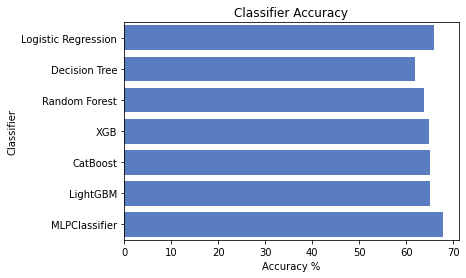

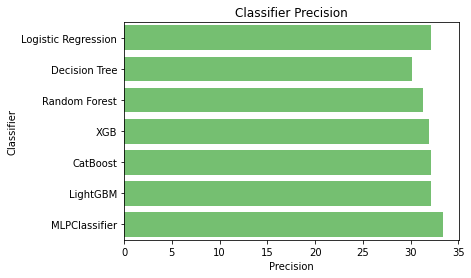

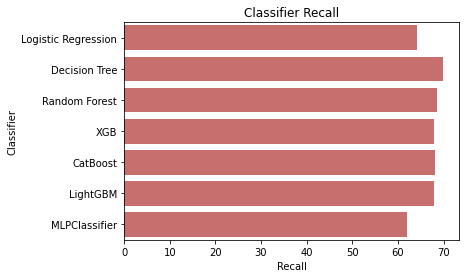

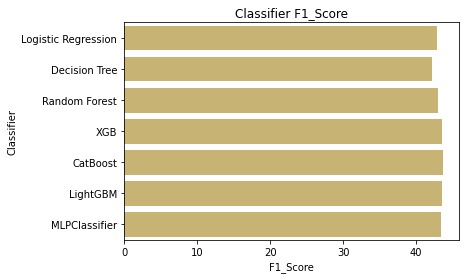

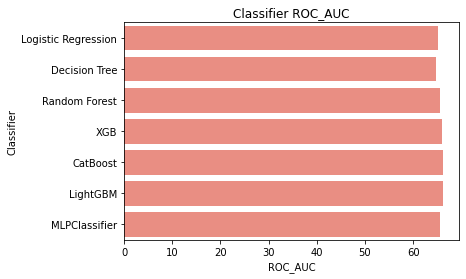

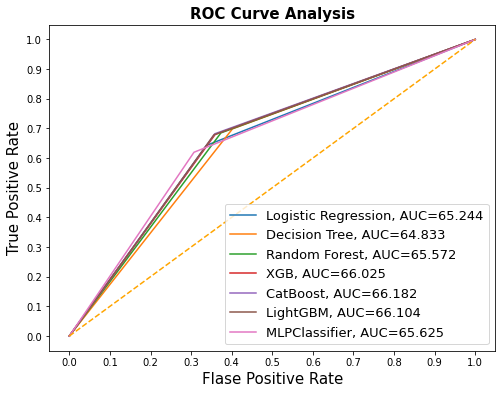

In [ ]:
model(X_train_rus, y_train_rus)

##### IHT

Logistic Regression
{'penalty': 'l2', 'C': 1000.0}
****train****
Accuracy: 40.61%
Precision: 24.02%
Recall: 92.10%
F1: 38.10%
AUC: 59.99%
[[129863 336083]
 [  9108 106221]] 

****test****
Accuracy: 40.48%
Precision: 23.97%
Recall: 92.10%
F1 Score: 38.04%
AUC: 59.90%
[[ 55323 144369]
 [  3905  45522]]
Decision Tree
{'min_samples_leaf': 40, 'max_depth': 10, 'criterion': 'gini'}
****train****
Accuracy: 44.10%
Precision: 24.82%
Recall: 89.58%
F1: 38.87%
AUC: 61.21%
[[153028 312918]
 [ 12017 103312]] 

****test****
Accuracy: 43.78%
Precision: 24.64%
Recall: 89.08%
F1 Score: 38.60%
AUC: 60.82%
[[ 65043 134649]
 [  5399  44028]]
Random Forest
{'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
****train****
Accuracy: 44.87%
Precision: 25.05%
Recall: 89.30%
F1: 39.12%
AUC: 61.58%
[[157805 308141]
 [ 12342 102987]] 

****test****
Accuracy: 44.48%
Precision: 24.86%
Recall: 88.95%
F1 Score: 38.86%
AUC: 61.21%
[[ 66840 132852]
 [  5463  43964]]


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


XGB
{'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 1.0}
****train****
Accuracy: 42.44%
Precision: 24.48%
Recall: 91.18%
F1: 38.60%
AUC: 60.78%
[[141554 324392]
 [ 10176 105153]] 

****test****
Accuracy: 42.18%
Precision: 24.36%
Recall: 90.91%
F1 Score: 38.42%
AUC: 60.52%
[[ 60149 139543]
 [  4491  44936]]
0:	learn: 0.6224487	total: 184ms	remaining: 54.9s
1:	learn: 0.5626285	total: 309ms	remaining: 46s
2:	learn: 0.5118453	total: 433ms	remaining: 42.8s
3:	learn: 0.4699931	total: 558ms	remaining: 41.3s
4:	learn: 0.4342888	total: 681ms	remaining: 40.2s
5:	learn: 0.4045644	total: 804ms	remaining: 39.4s
6:	learn: 0.3795424	total: 929ms	remaining: 38.9s
7:	learn: 0.3575524	total: 1.05s	remaining: 38.5s
8:	learn: 0.3384654	total: 1.19s	remaining: 38.3s
9:	learn: 0.3225053	total: 1.31s	remaining: 38s
10:	learn: 0.3085013	total: 1.44s	remaining: 37.9s
11:	learn: 0.2963347	total: 1.57s	remaining: 37.6s
12:	learn: 0.2853724	total: 1.7s	remaining: 37.5s
13

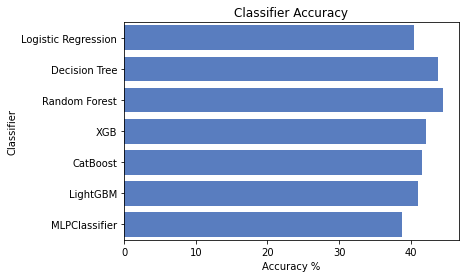

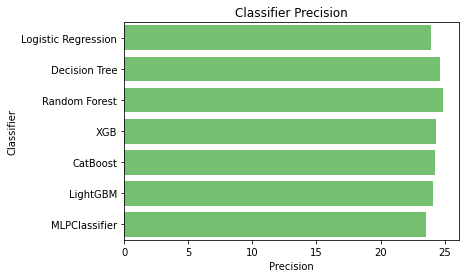

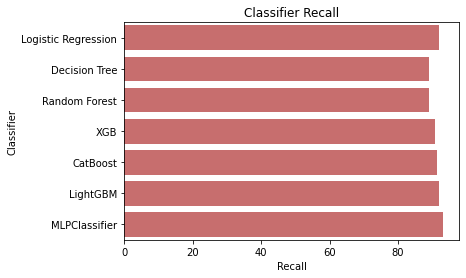

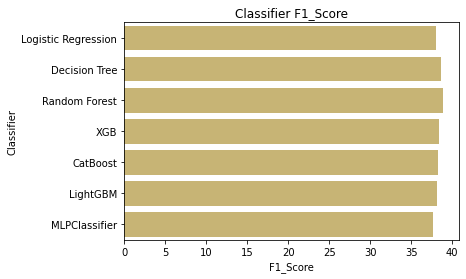

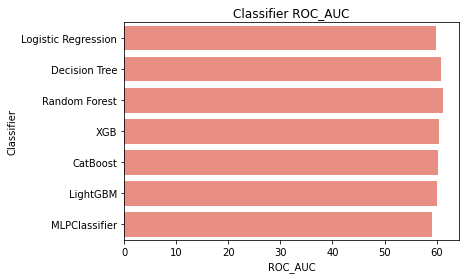

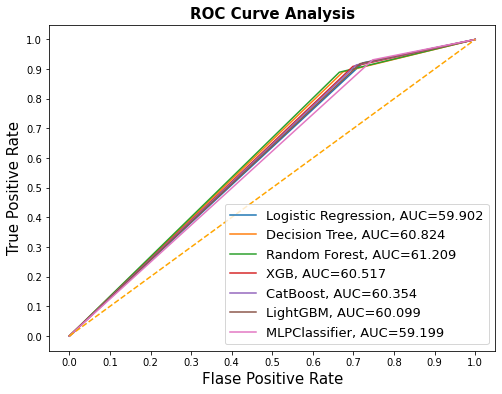

In [ ]:
model(X_train_iht, y_train_iht)

### Over sampling

#### SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression
{'penalty': 'l2', 'C': 1.0}
****train****
Accuracy: 65.99%
Precision: 32.19%
Recall: 64.08%
F1: 42.85%
AUC: 65.27%
[[340652 171928]
 [ 45741  81600]] 

****test****
Accuracy: 65.79%
Precision: 32.00%
Recall: 63.92%
F1 Score: 42.64%
AUC: 65.08%
[[145536  74141]
 [ 19693  34882]]
Decision Tree
{'min_samples_leaf': 60, 'max_depth': 10, 'criterion': 'entropy'}
****train****
Accuracy: 77.31%
Precision: 39.15%
Recall: 25.29%
F1: 30.73%
AUC: 57.76%
[[462544  50036]
 [ 95142  32199]] 

****test****
Accuracy: 77.08%
Precision: 38.34%
Recall: 24.94%
F1 Score: 30.22%
AUC: 57.49%
[[197792  21885]
 [ 40965  13610]]
Random Forest
{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
****train****
Accuracy: 74.40%
Precision: 37.45%
Recall: 42.80%
F1: 39.95%
AUC: 62.52%
[[421576  91004]
 [ 72844  54497]] 

****test****
Accuracy: 74.01%
Precision: 36.73%
Recall: 42.34%
F1 Score: 39.34%
AUC: 62.11%
[[179878  39799]
 [ 31468  23107]]
XGB
{'subsample': 0.8

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 0.6580838	total: 349ms	remaining: 1m 44s
1:	learn: 0.6271609	total: 693ms	remaining: 1m 43s
2:	learn: 0.6062713	total: 1.03s	remaining: 1m 42s
3:	learn: 0.5865443	total: 1.38s	remaining: 1m 41s
4:	learn: 0.5655125	total: 1.71s	remaining: 1m 41s
5:	learn: 0.5494890	total: 2.05s	remaining: 1m 40s
6:	learn: 0.5336115	total: 2.39s	remaining: 1m 40s
7:	learn: 0.5226311	total: 2.73s	remaining: 1m 39s
8:	learn: 0.5134386	total: 3.07s	remaining: 1m 39s
9:	learn: 0.5044242	total: 3.42s	remaining: 1m 39s
10:	learn: 0.4947050	total: 3.76s	remaining: 1m 38s
11:	learn: 0.4875219	total: 4.09s	remaining: 1m 38s
12:	learn: 0.4796657	total: 4.43s	remaining: 1m 37s
13:	learn: 0.4741204	total: 4.79s	remaining: 1m 37s
14:	learn: 0.4674105	total: 5.17s	remaining: 1m 38s
15:	learn: 0.4620225	total: 5.54s	remaining: 1m 38s
16:	learn: 0.4573039	total: 5.9s	remaining: 1m 38s
17:	learn: 0.4524458	total: 6.28s	remaining: 1m 38s
18:	learn: 0.4480990	total: 6.64s	remaining: 1m 38s
19:	learn: 0.4429486	to

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


MLPClassifier
{'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}
****train****
Accuracy: 74.99%
Precision: 36.50%
Recall: 34.67%
F1: 35.56%
AUC: 59.84%
[[435751  76829]
 [ 83186  44155]] 

****test****
Accuracy: 74.74%
Precision: 35.79%
Recall: 33.92%
F1 Score: 34.83%
AUC: 59.40%
[[186475  33202]
 [ 36065  18510]]


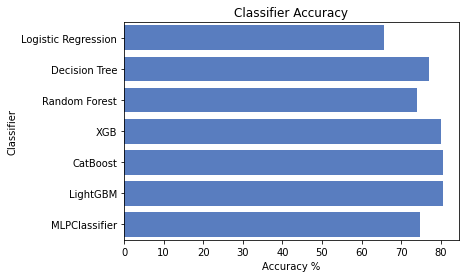

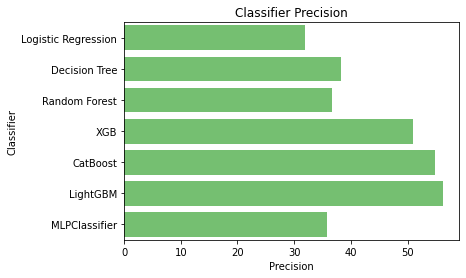

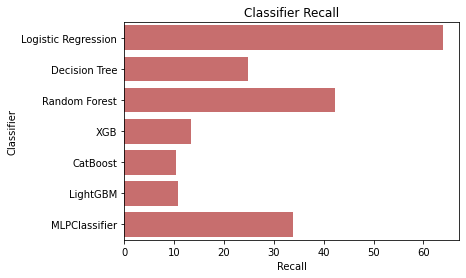

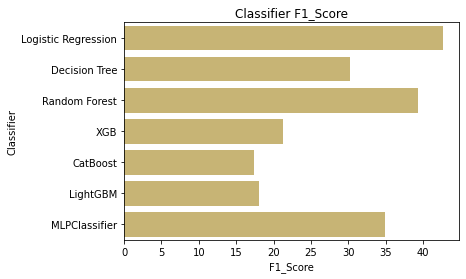

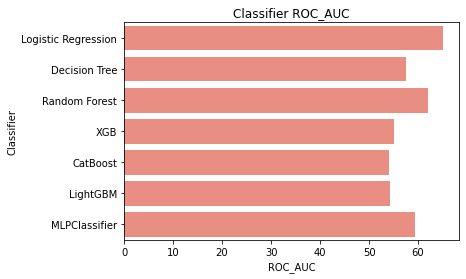

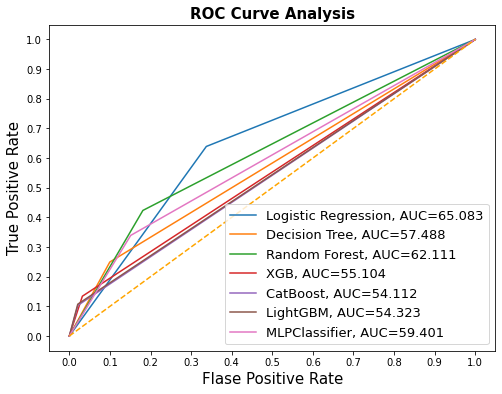

In [ ]:
model(X_train_smote, y_train_smote)

#### ADASYN

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression
{'penalty': 'l2', 'C': 1000.0}
****train****
Accuracy: 63.95%
Precision: 31.01%
Recall: 66.72%
F1: 42.34%
AUC: 64.99%
[[294748 171198]
 [ 38377  76952]] 

****test****
Accuracy: 63.87%
Precision: 30.97%
Recall: 66.81%
F1 Score: 42.32%
AUC: 64.98%
[[126099  73593]
 [ 16405  33022]]
Decision Tree
{'min_samples_leaf': 40, 'max_depth': 10, 'criterion': 'gini'}
****train****
Accuracy: 72.30%
Precision: 34.02%
Recall: 42.16%
F1: 37.66%
AUC: 60.96%
[[371649  94297]
 [ 66701  48628]] 

****test****
Accuracy: 72.20%
Precision: 33.90%
Recall: 42.22%
F1 Score: 37.60%
AUC: 60.92%
[[159009  40683]
 [ 28561  20866]]
Random Forest
{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
****train****
Accuracy: 71.42%
Precision: 34.70%
Recall: 49.94%
F1: 40.95%
AUC: 63.34%
[[357553 108393]
 [ 57733  57596]] 

****test****
Accuracy: 71.12%
Precision: 34.25%
Recall: 49.54%
F1 Score: 40.50%
AUC: 63.00%
[[152692  47000]
 [ 24942  24485]]


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


XGB
{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 1.0}
****train****
Accuracy: 79.57%
Precision: 45.97%
Recall: 17.01%
F1: 24.83%
AUC: 56.03%
[[442892  23054]
 [ 95715  19614]] 

****test****
Accuracy: 79.53%
Precision: 45.71%
Recall: 16.91%
F1 Score: 24.68%
AUC: 55.97%
[[189765   9927]
 [ 41070   8357]]


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 0.6664161	total: 524ms	remaining: 1m 44s
1:	learn: 0.6443089	total: 973ms	remaining: 1m 36s
2:	learn: 0.6239290	total: 1.45s	remaining: 1m 35s
3:	learn: 0.6069926	total: 1.91s	remaining: 1m 33s
4:	learn: 0.5932390	total: 2.35s	remaining: 1m 31s
5:	learn: 0.5836075	total: 2.83s	remaining: 1m 31s
6:	learn: 0.5658783	total: 3.3s	remaining: 1m 30s
7:	learn: 0.5582137	total: 3.76s	remaining: 1m 30s
8:	learn: 0.5454928	total: 4.19s	remaining: 1m 28s
9:	learn: 0.5381425	total: 4.64s	remaining: 1m 28s
10:	learn: 0.5256190	total: 5.08s	remaining: 1m 27s
11:	learn: 0.5187256	total: 5.54s	remaining: 1m 26s
12:	learn: 0.5102456	total: 6s	remaining: 1m 26s
13:	learn: 0.5013503	total: 6.47s	remaining: 1m 25s
14:	learn: 0.4923528	total: 6.92s	remaining: 1m 25s
15:	learn: 0.4876929	total: 7.39s	remaining: 1m 25s
16:	learn: 0.4832559	total: 7.86s	remaining: 1m 24s
17:	learn: 0.4768543	total: 8.31s	remaining: 1m 24s
18:	learn: 0.4720107	total: 8.75s	remaining: 1m 23s
19:	learn: 0.4660479	total

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


LightGBM
{'reg_alpha': 0.1, 'num_leaves': 127, 'min_data_in_leaf': 40, 'lambda_l2': 1, 'lambda_l1': 1.5}
****train****
Accuracy: 80.69%
Precision: 56.90%
Recall: 10.94%
F1: 18.35%
AUC: 54.44%
[[456391   9555]
 [102716  12613]] 

****test****
Accuracy: 80.40%
Precision: 53.19%
Recall: 10.08%
F1 Score: 16.95%
AUC: 53.94%
[[195306   4386]
 [ 44444   4983]]


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier
{'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}
****train****
Accuracy: 74.46%
Precision: 36.67%
Recall: 39.52%
F1: 38.04%
AUC: 61.31%
[[387210  78736]
 [ 69748  45581]] 

****test****
Accuracy: 74.01%
Precision: 35.58%
Recall: 38.22%
F1 Score: 36.85%
AUC: 60.55%
[[165494  34198]
 [ 30538  18889]]


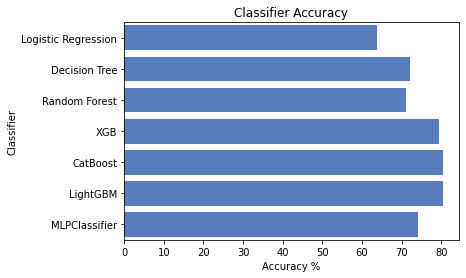

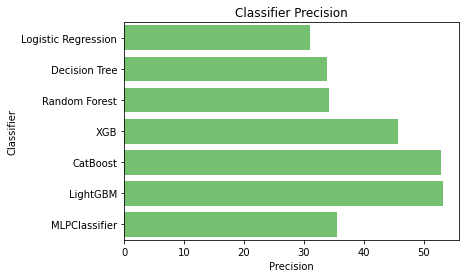

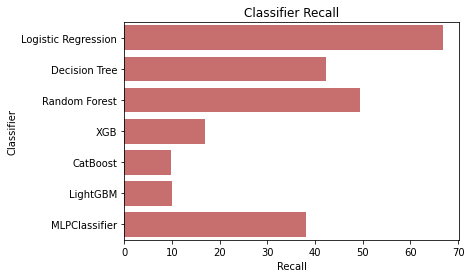

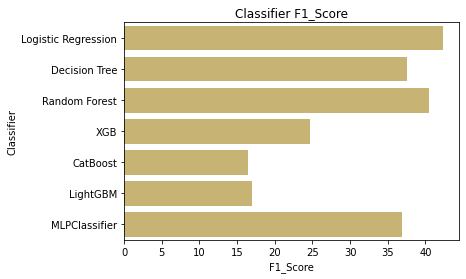

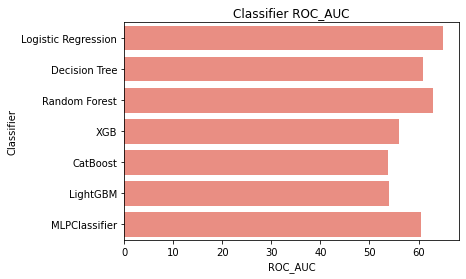

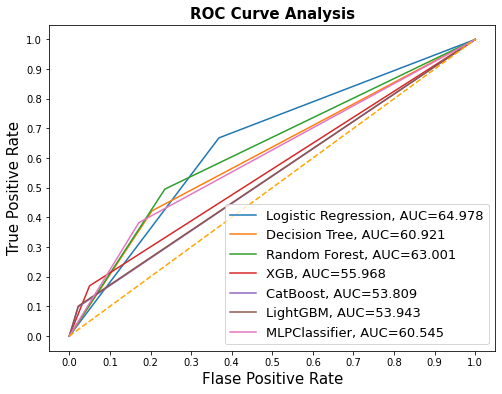

In [ ]:
model(X_train_ada, y_train_ada)

# Partial Dependence

In [ ]:
# # Plot partial dependence plots
# from sklearn.inspection import partial_dependence
# from sklearn.inspection import plot_partial_dependence
# from sklearn.linear_model import LogisticRegression
# from time import time

# # sampling
# iht = InstanceHardnessThreshold(random_state=0, estimator=LogisticRegression(solver='lbfgs', multi_class='auto'))
# X_train_iht_vs, y_train_iht_vs = iht.fit_resample(X_train, y_train)

# #model
# lr = LogisticRegression(penalty='l2', C=100)
# lr.fit(X_train_iht_vs, y_train_iht_vs)
# _, ax = plt.subplots(figsize=(30, 15))
# print('Computing partial dependence plots...')
# tic = time()

# features = ['int_rate', 'sub_grade', 'grade', 'term', 'income_to_payment_ratio',
#                   'avg_cur_bal', 'loan_amnt', 'installment', 'mort_acc', 'fico_', 'home_ownership', 
#                   'annual_inc', 'revol_bal', 'emp_length_', 'revol_util', 'verification_status']
# display = plot_partial_dependence(
#        lr, X_train_vs, features,
#        n_jobs=3, grid_resolution=50, ax=ax, n_cols=4, target=1)

# print(f"done in {time() - tic:.3f}s")
# display.figure_.suptitle(
# "Partial dependence plots of borrower charged off the loan based on top most influential features"
# , fontsize=25)
# display.figure_.subplots_adjust(wspace=0.4, hspace=0.5)

Confusion matrix MLP + IHT Model
AxesSubplot(0.125,0.125;0.62x0.755)


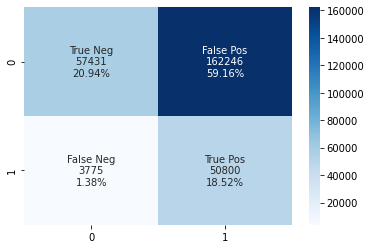

In [ ]:
!pip install shap
import shap
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix

#model mlp
mlp_final =  MLPClassifier(solver='sgd', learning_rate='adaptive', 
                           hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation='tanh')

mlp_final.fit(X_train_iht, y_train_iht)
mlp_pred = mlp_final.predict(X_test)

#model lgbm
lgbm_final = LGBMClassifier(class_weight='balanced', reg_alpha=0.5, num_leaves=127, 
                            min_data_in_leaf=100, lambda_l2=0, lambda_l1=0)
lgbm_final.fit(X_train_iht, y_train_iht)
lgbm_pred = lgbm_final.predict(X_test)

# heatmap confusion matrix 
print('Confusion matrix MLP + IHT Model')
cf_matrix = confusion_matrix(y_test, mlp_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
print(sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues'))

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


CPU times: user 1h 44min 56s, sys: 770 ms, total: 1h 44min 57s
Wall time: 26min 26s


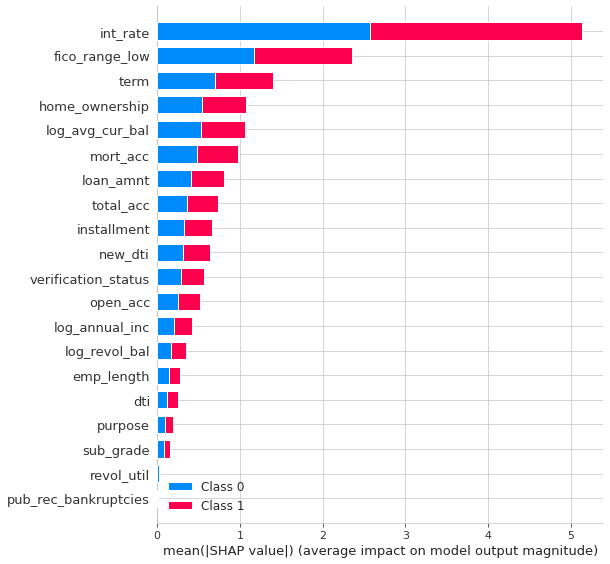

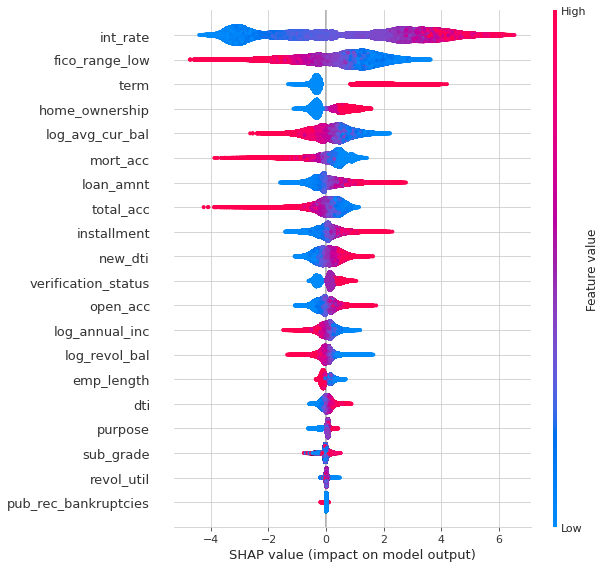

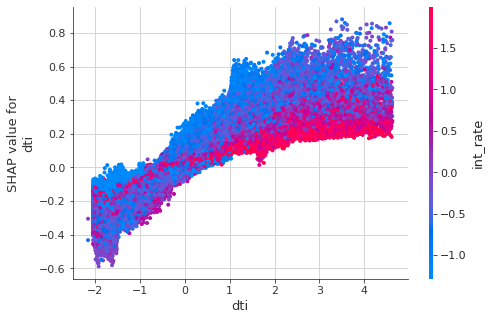

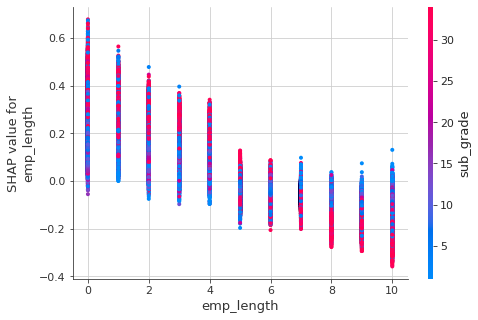

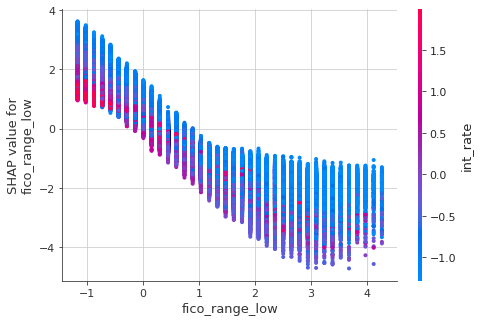

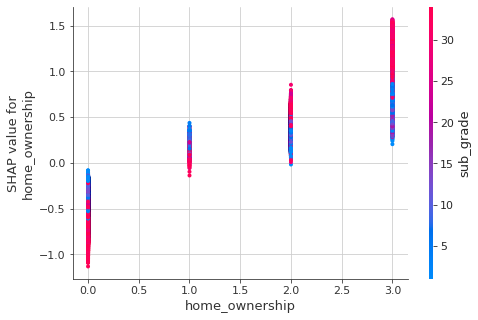

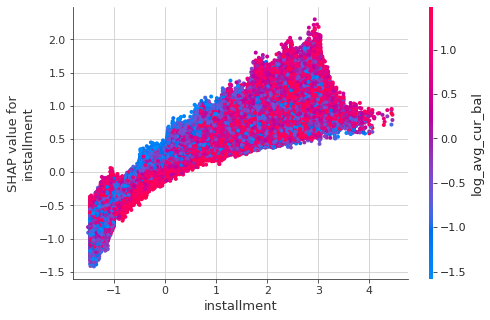

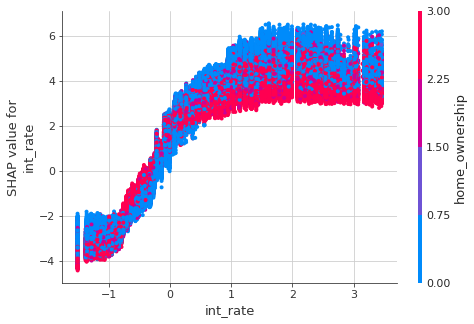

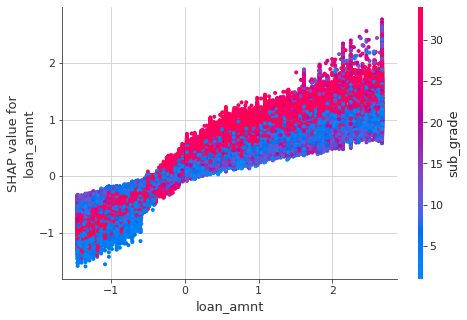

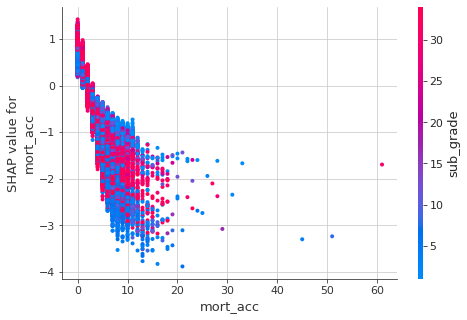

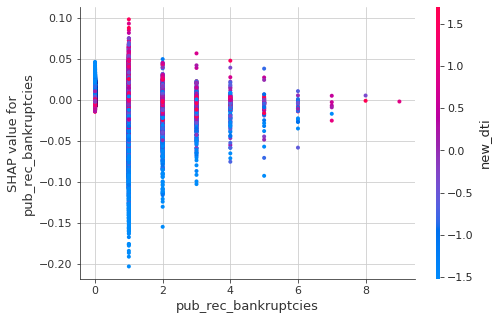

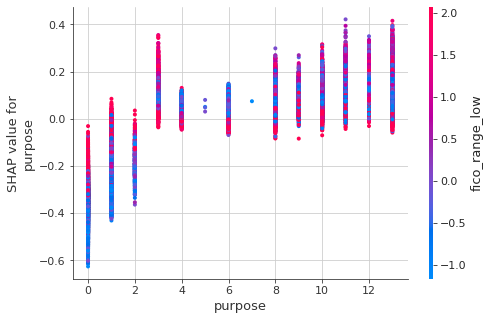

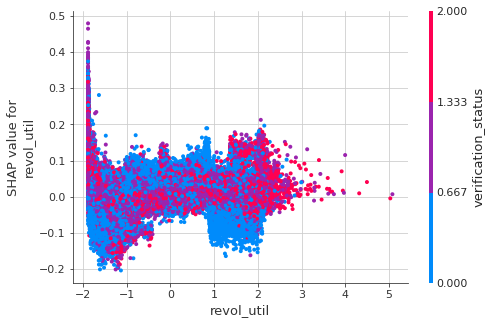

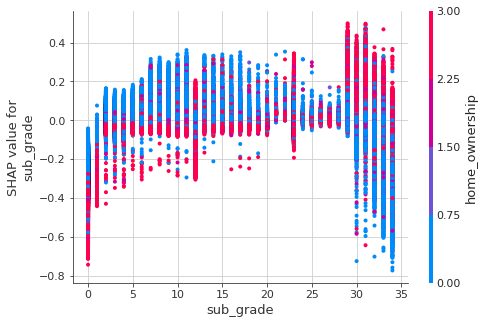

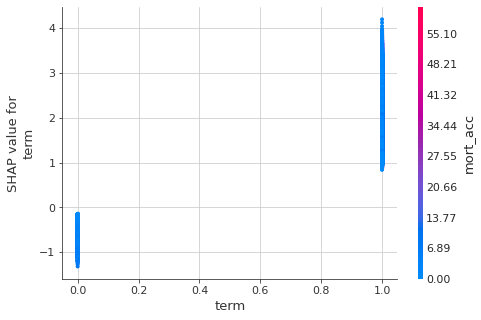

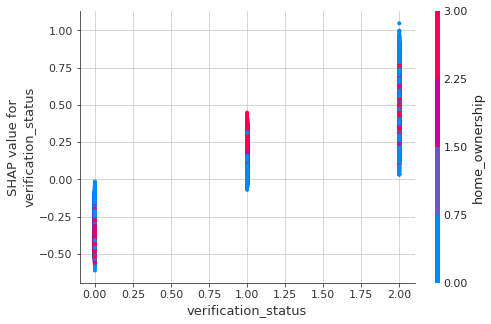

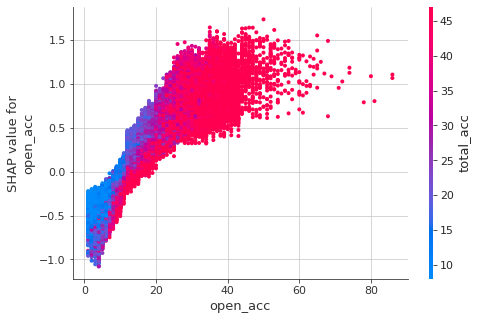

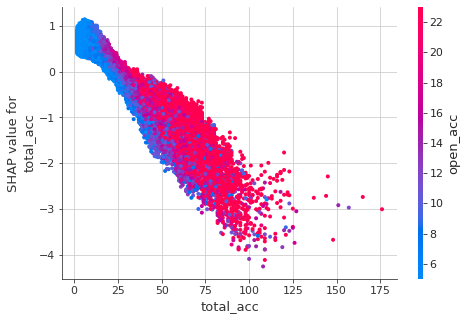

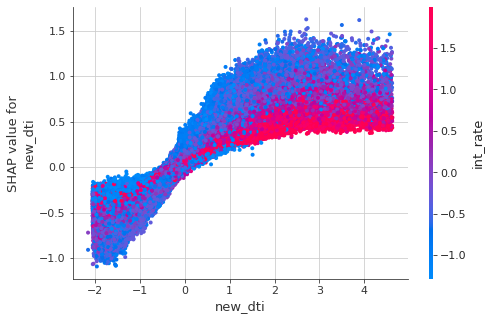

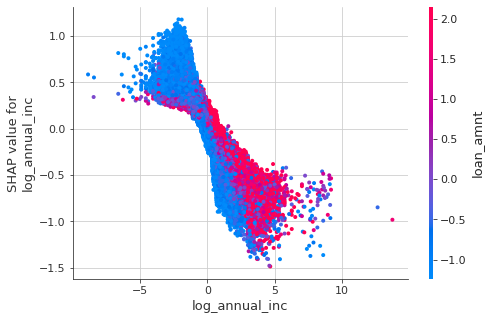

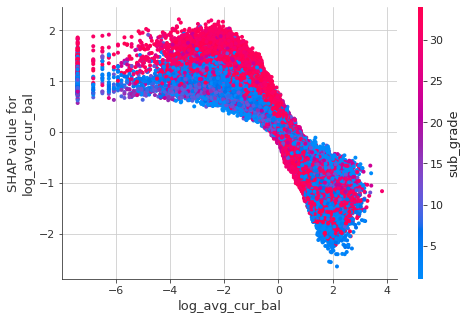

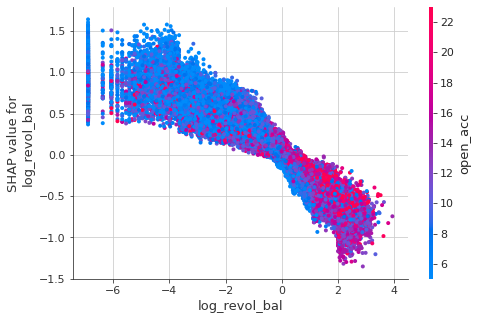

In [ ]:
# PDP Box plot LightGBM model
%time shap_values = shap.TreeExplainer(lgbm_final).shap_values(X_train)
sns.set_style("whitegrid")
shap.summary_plot(shap_values, X_train)
shap.summary_plot(shap_values[1], X_train)
# shap.force_plot(shap_values, X_train)

for name in X_train.columns:
    shap.dependence_plot(name, shap_values[1], X_train)

# Predict Current borrower

In [ ]:
cur_loans = pd.read_csv('/content/drive/MyDrive/Independent Study/Dataset/cur_loans.csv').iloc[:,1:]

In [ ]:
cur_loans

,application_type,dti,emp_length,emp_title,fico_range_low,grade,home_ownership,installment,int_rate,loan_amnt,loan_status,mort_acc,pub_rec_bankruptcies,purpose,revol_util,sub_grade,term,verification_status,issue_d,last_pymnt_d,open_acc,total_acc,addr_state,new_dti,log_annual_inc,log_avg_cur_bal,log_revol_bal
0,0.0,-0.712379,10.0,Nurse,0.362414,1.0,0.0,2.114551,-0.182262,1.643857,2,3.0,0.0,1.0,-0.507147,9.0,0.0,1.0,2017-09-01,2020-05-01,20.0,42.0,NJ,-0.710844,1.426055,0.905788,1.204156
1,0.0,1.315614,9.0,Driver,1.814426,2.0,0.0,1.726696,0.425064,2.453863,2,4.0,0.0,2.0,-1.046969,13.0,1.0,2.0,2017-09-01,2020-05-01,12.0,26.0,TX,1.315671,0.952442,0.833561,0.227862
2,0.0,-0.324293,5.0,Senior Investigator,-0.073189,0.0,3.0,0.135663,-0.980121,0.023846,2,0.0,0.0,2.0,0.443585,4.0,0.0,0.0,2017-09-01,2020-05-01,12.0,20.0,VA,-0.323980,0.180645,0.281945,0.373655
3,0.0,-0.721027,10.0,CSM,0.217213,0.0,3.0,-0.857798,-0.980121,-0.887411,2,0.0,1.0,2.0,-0.962370,4.0,0.0,1.0,2017-09-01,2020-05-01,13.0,20.0,IL,-0.719485,-1.493481,-2.073759,-0.189469
4,0.0,-0.111332,10.0,pdr technician,-1.234799,1.0,0.0,-0.694212,-0.182262,-0.786160,2,2.0,0.0,9.0,-0.676345,9.0,0.0,1.0,2017-09-01,2020-05-01,7.0,15.0,MA,-0.115708,0.420080,1.768082,-0.474017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879011,0.0,-0.831291,0.0,High School Teacher,1.524024,3.0,3.0,-0.579716,0.810100,-0.381157,2,0.0,0.0,9.0,-1.224224,15.0,1.0,1.0,2017-04-01,2020-05-01,13.0,14.0,CA,-0.830599,-0.701994,-0.303432,-2.109939
879012,0.0,0.980498,3.0,laborer,-1.089598,4.0,2.0,-0.272596,2.497117,-0.279907,2,1.0,0.0,2.0,0.959236,23.0,1.0,0.0,2017-04-01,2020-05-01,7.0,17.0,CA,0.980730,-0.667628,-0.496037,0.236620
879013,0.0,1.269130,3.0,Solution Architect,-1.234799,3.0,3.0,-0.317035,0.810100,-0.077405,2,0.0,0.0,2.0,0.790038,15.0,1.0,2.0,2017-04-01,2020-05-01,16.0,41.0,TX,1.264832,0.255920,0.112118,1.044678
879014,0.0,0.707000,0.0,System Engineer,-0.944397,2.0,0.0,0.442114,-0.033408,1.036353,2,4.0,0.0,6.0,0.560412,10.0,1.0,0.0,2017-04-01,2020-05-01,14.0,31.0,VA,0.705256,0.615052,0.877793,1.369206


In [ ]:
predict = cur_loans.drop(columns=['loan_status', 'issue_d', 'last_pymnt_d', 'addr_state', 'emp_title'])

In [ ]:
predict = mlp_final.predict(predict)

In [ ]:
df = pd.DataFrame(predict, columns=['predict'])

In [ ]:
df.predict.value_counts()

1    707323
0    171693
Name: predict, dtype: int64

In [ ]:
new = pd.concat([cur_loans, df], axis=1)

In [ ]:
new.shape

(879016, 28)

In [ ]:
new

,application_type,dti,emp_length,emp_title,fico_range_low,grade,home_ownership,installment,int_rate,loan_amnt,loan_status,mort_acc,pub_rec_bankruptcies,purpose,revol_util,sub_grade,term,verification_status,issue_d,last_pymnt_d,open_acc,total_acc,addr_state,new_dti,log_annual_inc,log_avg_cur_bal,log_revol_bal,predict
0,0.0,-0.712379,10.0,Nurse,0.362414,1.0,0.0,2.114551,-0.182262,1.643857,2,3.0,0.0,1.0,-0.507147,9.0,0.0,1.0,2017-09-01,2020-05-01,20.0,42.0,NJ,-0.710844,1.426055,0.905788,1.204156,1
1,0.0,1.315614,9.0,Driver,1.814426,2.0,0.0,1.726696,0.425064,2.453863,2,4.0,0.0,2.0,-1.046969,13.0,1.0,2.0,2017-09-01,2020-05-01,12.0,26.0,TX,1.315671,0.952442,0.833561,0.227862,1
2,0.0,-0.324293,5.0,Senior Investigator,-0.073189,0.0,3.0,0.135663,-0.980121,0.023846,2,0.0,0.0,2.0,0.443585,4.0,0.0,0.0,2017-09-01,2020-05-01,12.0,20.0,VA,-0.323980,0.180645,0.281945,0.373655,1
3,0.0,-0.721027,10.0,CSM,0.217213,0.0,3.0,-0.857798,-0.980121,-0.887411,2,0.0,1.0,2.0,-0.962370,4.0,0.0,1.0,2017-09-01,2020-05-01,13.0,20.0,IL,-0.719485,-1.493481,-2.073759,-0.189469,1
4,0.0,-0.111332,10.0,pdr technician,-1.234799,1.0,0.0,-0.694212,-0.182262,-0.786160,2,2.0,0.0,9.0,-0.676345,9.0,0.0,1.0,2017-09-01,2020-05-01,7.0,15.0,MA,-0.115708,0.420080,1.768082,-0.474017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879011,0.0,-0.831291,0.0,High School Teacher,1.524024,3.0,3.0,-0.579716,0.810100,-0.381157,2,0.0,0.0,9.0,-1.224224,15.0,1.0,1.0,2017-04-01,2020-05-01,13.0,14.0,CA,-0.830599,-0.701994,-0.303432,-2.109939,1
879012,0.0,0.980498,3.0,laborer,-1.089598,4.0,2.0,-0.272596,2.497117,-0.279907,2,1.0,0.0,2.0,0.959236,23.0,1.0,0.0,2017-04-01,2020-05-01,7.0,17.0,CA,0.980730,-0.667628,-0.496037,0.236620,1
879013,0.0,1.269130,3.0,Solution Architect,-1.234799,3.0,3.0,-0.317035,0.810100,-0.077405,2,0.0,0.0,2.0,0.790038,15.0,1.0,2.0,2017-04-01,2020-05-01,16.0,41.0,TX,1.264832,0.255920,0.112118,1.044678,1
879014,0.0,0.707000,0.0,System Engineer,-0.944397,2.0,0.0,0.442114,-0.033408,1.036353,2,4.0,0.0,6.0,0.560412,10.0,1.0,0.0,2017-04-01,2020-05-01,14.0,31.0,VA,0.705256,0.615052,0.877793,1.369206,1


In [ ]:
# new.to_csv('/content/drive/MyDrive/Independent Study/Dataset/analytics.csv')

In [ ]:
new = pd.read_csv('/content/drive/MyDrive/Independent Study/Dataset/analytics.csv').iloc[:,1:]

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


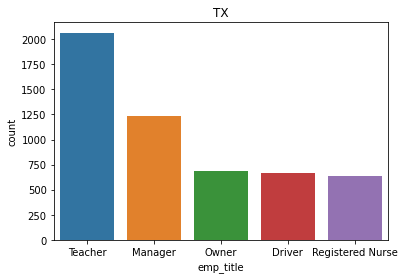

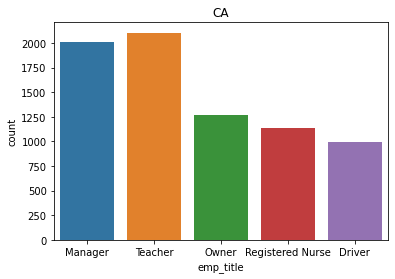

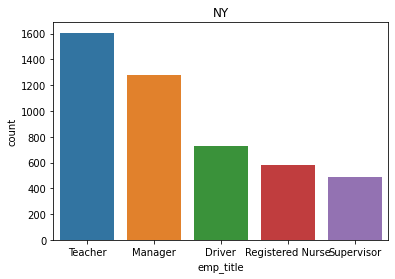

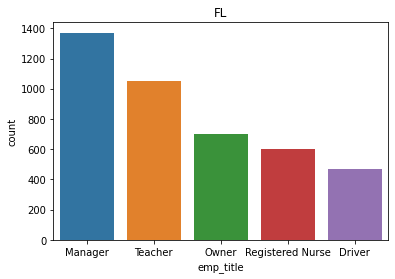

In [ ]:
states = ['TX', 'CA', 'NY', 'FL']
for state in states : 
    new_ana = new.loc[new['addr_state'].isin([state])]  
    s = new_ana.loc[new_ana['predict'] == 1]
    fig, ax = plt.subplots(1,1)
    plt.title(state)
    sns.countplot(new_ana['emp_title'], order=s.emp_title.value_counts().iloc[:5].index)

In [ ]:
new_ana = new.loc[new['addr_state'].isin(['CA'])]

In [ ]:
teacher = new_ana.loc[new['emp_title'].isin(['Teacher'])]

In [ ]:
teacher.purpose.value_counts()

2.0     1186
1.0      575
9.0      108
4.0      106
6.0       37
7.0       27
12.0      16
5.0       14
8.0       14
11.0      10
0.0        9
10.0       1
Name: purpose, dtype: int64

In [ ]:
new_ana.emp_title.value_counts()

Teacher                    2103
Manager                    2007
Owner                      1265
Registered Nurse           1140
Driver                      999
                           ... 
Pre-press                     1
Customer Adviser              1
Air traffic controller        1
serve                         1
press operator                1
Name: emp_title, Length: 41686, dtype: int64

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


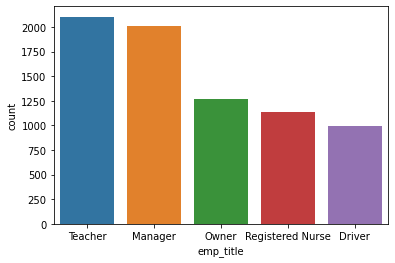

In [ ]:
sns.countplot(new_ana['emp_title'], order=new_ana.emp_title.value_counts().iloc[:5].index)